In [2]:
import pandas as pd
import numpy as np
import os

In [3]:
import pickle
def save_data(data, outfile):
    with open(outfile, 'wb') as outf:
        pickle.dump(data, outf)

def load_data(infile):
    with open(infile, 'rb') as inf:
        data = pickle.load(inf)
    return data

In [4]:
def score_all(real_lab,score,cut_off=0.5,tag=True):
    power = score.notna().sum()/score.shape[0]
    #print('power =',power)
    real_lab = real_lab[score.notna()]
    score = score[score.notna()]
    #score = score[]
    from sklearn.metrics import confusion_matrix,matthews_corrcoef,cohen_kappa_score
    if tag==True:
        score= score
    else:
        score = -1 * score
        cut_off = -1 * cut_off
            

    MCC = matthews_corrcoef(real_lab,(score > cut_off).astype('int'))
    cks = cohen_kappa_score(real_lab, (score > cut_off).astype('int'))
    
    from sklearn.metrics import f1_score,balanced_accuracy_score
    F1_score = f1_score(real_lab, (score > cut_off).astype('int'))
    balanced_accuracy_score = balanced_accuracy_score(real_lab, (score > cut_off).astype('int'))
    #print('F1 =',F1_score)
    
    from sklearn.metrics import average_precision_score
    APS =  average_precision_score(real_lab,score)
    #print('APS =',APS)
    from sklearn.metrics import precision_recall_curve
    pre, recall, _ = precision_recall_curve(real_lab,score)
    
    from sklearn.metrics import roc_curve, auc
    fpr, tpr, _ = roc_curve(real_lab,score)
    roc_auc = auc(fpr, tpr)

    return [MCC,cks,F1_score,balanced_accuracy_score],power,fpr, tpr,roc_auc, pre, recall,APS

In [5]:
def auc_all(real_lab,score,cut_off=0.5,tag=True):
    power = score.notna().sum()/score.shape[0]
    #print('power =',power)
    real_lab = real_lab[score.notna()]
    score = score[score.notna()]
    #score = score[]
    from sklearn.metrics import confusion_matrix
    if tag==True:
        score= score
    else:
        score = -1 * score
        cut_off = -1 * cut_off

    from sklearn.metrics import roc_curve, auc
    fpr, tpr, _ = roc_curve(real_lab,score)
    roc_auc = auc(fpr, tpr)

    return roc_auc

#### data1

In [6]:
x_test1_prob, x_test2_prob = load_data('x_test1_test2_prob.pkl')
x_test1_id=load_data('test1_data_id.pkl')
x_test1_af=load_data('x_test1_af.pkl')
x_test1_func = load_data('x_test1_func.pkl')
x_test1_exonic_func = load_data('x_test1_exonic_func.pkl')
x_test1_length=load_data('x_test1_length.pkl')
x_test2_id=load_data('test2_data_id.pkl')
y_test1,test1_star=load_data('y_test1_star.pkl')
y_test2,test2_lab=load_data('y_test2_lab.pkl')


In [7]:
cadd16_test1=pd.read_csv('/media/bgi/zhangtongda/bgi//tfs11/ST_MCHRI_BIGDATA/zhangtongda/from_zfssz2_project/project//variang_predict2/INDEL_pred/cadd_16/test1_data_cadd16.csv',sep='\t',header=0)
cadd16_test1 = cadd16_test1.groupby(['#Chrom_Pos_Ref_Alt']).median()
cadd16_test1 = cadd16_test1.rename(columns={'PHRED':'PHRED_v16'})
# merge_df = pd.concat([test_data_anno_score,cadd16_test1],axis=1)


In [8]:
cadd14_test1=pd.read_csv('/media/bgi/zhangtongda/bgi//tfs11/ST_MCHRI_BIGDATA/zhangtongda/from_zfssz2_project/project/variang_predict2//INDEL_pred/cadd_14/test1_data_cadd14.csv',sep='\t',header=0)
cadd14_test1 = cadd14_test1.groupby(['#Chrom_Pos_Ref_Alt']).median()
cadd14_test1 = cadd14_test1.rename(columns={'PHRED':'PHRED_v14'})
# merge_df = pd.concat([test_data_anno_score,cadd14_test1],axis=1)


In [9]:
capice_train_id=pd.read_csv('/media/bgi/zhangtongda/project/project_bk/CAPICE_code/data/train_input.tsv.id.list',sep='\t',header=0)

capice_test1=pd.read_csv('/media/bgi/zhangtongda/bgi//tfs11/ST_MCHRI_BIGDATA/zhangtongda/from_zfssz2_project/project/variang_predict2/INDEL_pred/capice/test_capice.csv',sep='\t',header=0)
capice_test1 = capice_test1.groupby(['chr_pos_ref_alt']).median()
capice_test1 = capice_test1.rename(columns={'probabilities':'capice_p'})
drop_id = list(set(capice_test1.index.to_list()).intersection(set(capice_train_id['#Chrom_Pos_Ref_Alt'])))
capice_test1 = capice_test1.drop(drop_id)

In [10]:
indelpred_test1 = pd.DataFrame(x_test1_prob)
indelpred_test1.index=x_test1_id
indelpred_test1.columns=['INDELpred_score']
indelpred_test1['tag']=y_test1.values
indelpred_test1['gold_stars']=test1_star.values
indelpred_test1['af']=x_test1_af.values
indelpred_test1['func']=x_test1_func.values
indelpred_test1['exonic_func']=x_test1_exonic_func.values
indelpred_test1['length'] = x_test1_length.values
# indelpred_test1
merge_df1 = pd.concat([indelpred_test1,cadd16_test1,cadd14_test1,capice_test1],axis=1)
merge_df=merge_df1[merge_df1['INDELpred_score']>=0]

In [11]:
cut_off=0.5739323582253674
matrix_our,power_our,fpr_our, tpr_our,auc_our, pre_our, recall_our ,aps_our = score_all(merge_df['tag'],merge_df['INDELpred_score'],cut_off)
matrix_cadd16,power_cadd16,fpr_cadd16, tpr_cadd16,auc_cadd16, pre_cadd16, recall_cadd16 ,aps_cadd16 = score_all(merge_df['tag'],merge_df['PHRED_v16'],20)
matrix_cadd14,power_cadd14,fpr_cadd14, tpr_cadd14,auc_cadd14, pre_cadd14, recall_cadd14 ,aps_cadd14 = score_all(merge_df['tag'],merge_df['PHRED_v14'],20)
matrix_capice,power_capice,fpr_capice, tpr_capice,auc_capice, pre_capice, recall_capice ,aps_capice = score_all(merge_df['tag'],merge_df['capice_p'],0.02)


merge_sub_df = merge_df[merge_df['gold_stars']>=2]

matrix_our2,power_our2,fpr_our2, tpr_our2,auc_our2, pre_our2, recall_our2 ,aps_our2 = score_all(merge_sub_df['tag'],merge_sub_df['INDELpred_score'],cut_off)
matrix_cadd162,power_cadd162,fpr_cadd162, tpr_cadd162,auc_cadd162, pre_cadd162, recall_cadd162 ,aps_cadd162 = score_all(merge_sub_df['tag'],merge_sub_df['PHRED_v16'],20)
matrix_cadd142,power_cadd142,fpr_cadd142, tpr_cadd142,auc_cadd142, pre_cadd142, recall_cadd142 ,aps_cadd142 = score_all(merge_sub_df['tag'],merge_sub_df['PHRED_v14'],20)
matrix_capice2,power_capice2,fpr_capice2, tpr_capice2,auc_capice2, pre_capice2, recall_capice2 ,aps_capice2 = score_all(merge_sub_df['tag'],merge_sub_df['capice_p'],0.02)


In [47]:
# for star in [0,1,2,3]:
#     merge_sub_df = merge_df[merge_df['gold_stars']>=star]
#     print('INDELpred','\t',auc_all(merge_sub_df['tag'],merge_sub_df['INDELpred_score'],cut_off))
#     print('CADD v1.6','\t',auc_all(merge_sub_df['tag'],merge_sub_df['PHRED_v16'],20))
#     print('CADD v1.4','\t',auc_all(merge_sub_df['tag'],merge_sub_df['PHRED_v14'],20))
#     print('CAPICE','\t',auc_all(merge_sub_df['tag'],merge_sub_df['capice_p'],0.02))


In [48]:
#Sensitivity=TPR,    Specificity=TNR,F1,Precision=PPV,NPV
matrix = pd.concat([pd.DataFrame(matrix_our,columns=['INDELpred']),
           pd.DataFrame(matrix_cadd16,columns=['CADD v1.6']),
           pd.DataFrame(matrix_cadd14,columns=['CADD v1.4']),
           pd.DataFrame(matrix_capice,columns=['CAPICE']),
          ],axis=1)
matrix = matrix.T.round(3)
matrix.columns=['MCC','Cohen\'s kappa','F1','balanced accuracy']

matrix2 = pd.concat([pd.DataFrame(matrix_our2,columns=['INDELpred']),
           pd.DataFrame(matrix_cadd162,columns=['CADD v1.6']),
           pd.DataFrame(matrix_cadd142,columns=['CADD v1.4']),
           pd.DataFrame(matrix_capice2,columns=['CAPICE']),
          ],axis=1)
matrix2 = matrix2.T.round(3)
matrix2.columns=['MCC','Cohen\'s kappa','F1','balanced accuracy']
#MCC,cks,F1_score,balanced_accuracy_score
# matrix['power'] = [power_our,power_cadd16,power_cadd14,power_capice]
# matrix

In [49]:
matrix

,MCC,Cohen's kappa,F1,balanced accuracy
INDELpred,0.951,0.951,0.964,0.972
CADD v1.6,0.803,0.800,0.898,0.902
CADD v1.4,0.790,0.787,0.891,0.896
CAPICE,0.792,0.792,0.897,0.896


In [50]:
matrix2

,MCC,Cohen's kappa,F1,balanced accuracy
INDELpred,0.942,0.942,0.961,0.975
CADD v1.6,0.761,0.756,0.827,0.863
CADD v1.4,0.769,0.763,0.831,0.865
CAPICE,0.850,0.849,0.900,0.928


In [51]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

from matplotlib.ticker import FormatStrFormatter

font_size = 10
rc={'font.size': font_size, 'axes.labelsize': font_size, 'figure.dpi':400,'axes.linewidth':1,
    'axes.titlesize': font_size, 'xtick.labelsize': font_size, 'ytick.labelsize': font_size} # 'figure.figsize':(11.7/1.5,8.27/1.5)

sns.set(style='ticks',rc=rc) 
sns.set_context("paper")
# sns.palplot(sns.color_palette(flatui))

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.unicode_minus']=False # negative minus sign

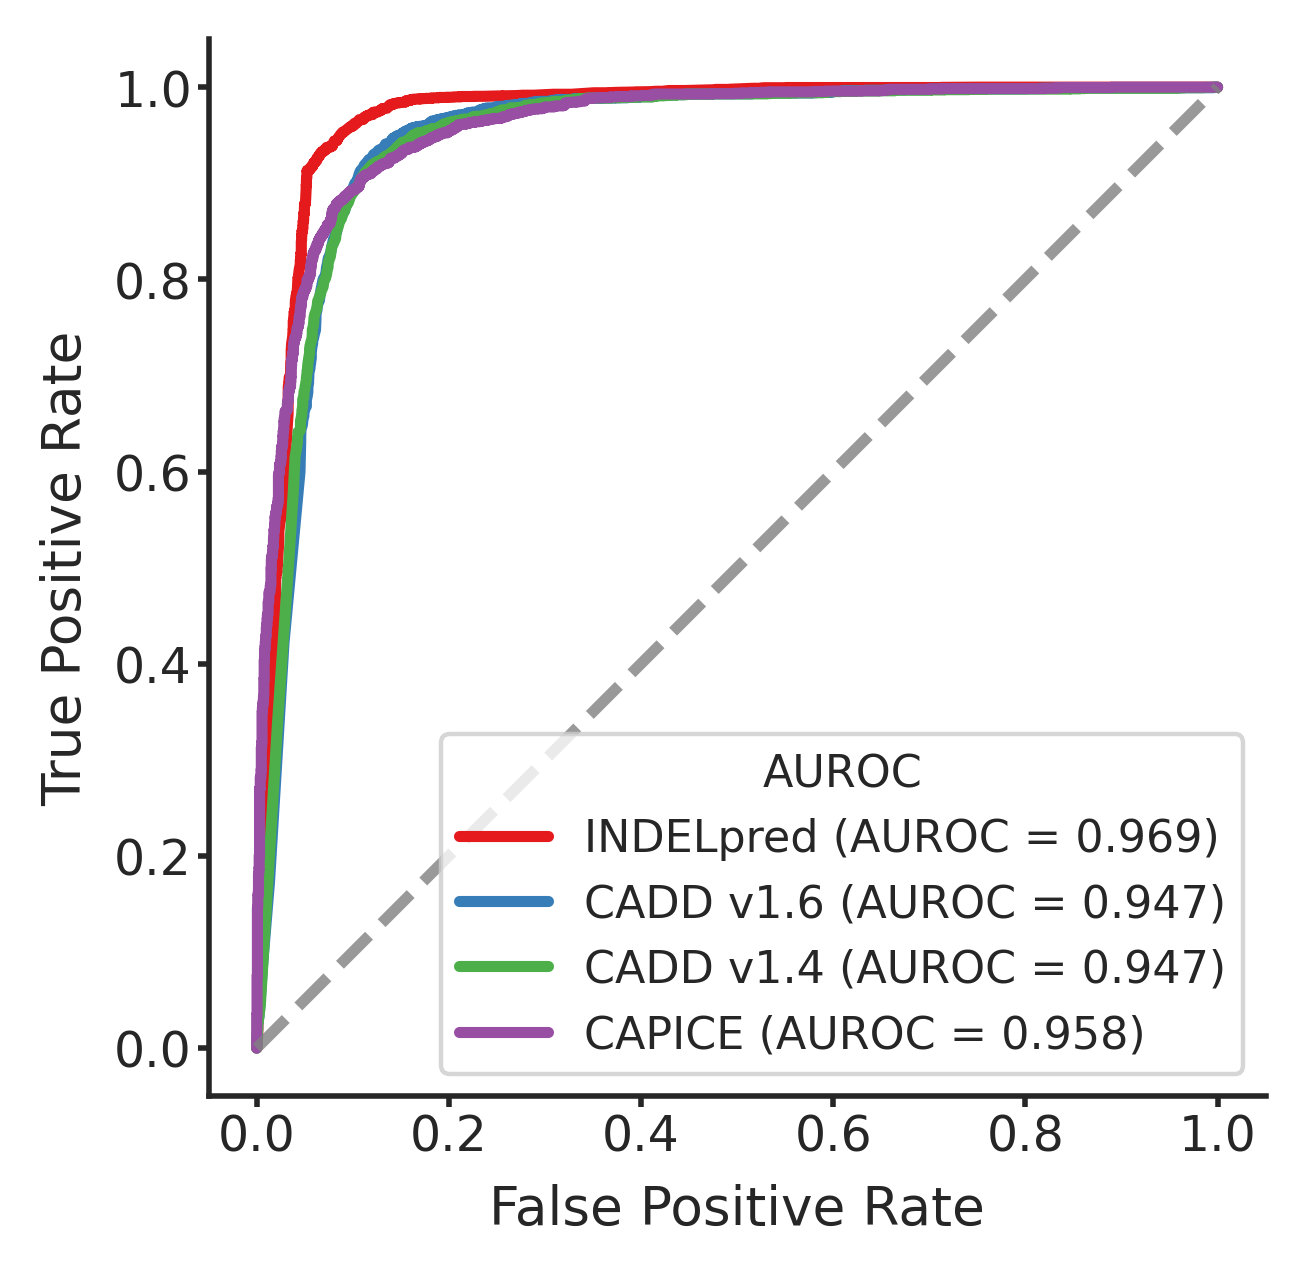

In [52]:
#palette  = dict({'INDELpred':"#e41a1c", 'CADD v1.6':"#377eb8", 'CADD v1.4':"#4daf4a", 'CAPICE':"#984ea3"})
import matplotlib.pyplot as plt
import seaborn as sns
fig, axs = plt.subplots(1,1,figsize=(3.5,3.5))

axs.plot(fpr_our, tpr_our, label='INDELpred (AUROC = %0.3f)' % auc_our,lw=2,color="#e41a1c")
axs.plot(fpr_cadd16, tpr_cadd16, label='CADD v1.6 (AUROC = %0.3f)' % auc_cadd16,lw=2,color="#377eb8")
axs.plot(fpr_cadd14, tpr_cadd14, label='CADD v1.4 (AUROC = %0.3f)' % auc_cadd14,lw=2,color="#4daf4a")
axs.plot(fpr_capice, tpr_capice, label='CAPICE (AUROC = %0.3f)' % auc_capice,lw=2,color="#984ea3")

axs.plot([0, 1], [0, 1], linestyle='--', lw=2, color='gray', alpha=.8)
axs.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
)
sns.despine()
axs.set_aspect('equal','box')
axs.legend(loc="lower right",title='AUROC',title_fontsize=8,fontsize=8)#,frameon=False)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
axs.tick_params(direction='out', length=2, pad=1, width=1)


plt.savefig("Fig20220315/Fig2_all_auc.pdf", dpi=400, bbox_inches='tight', pad_inches = 0.)

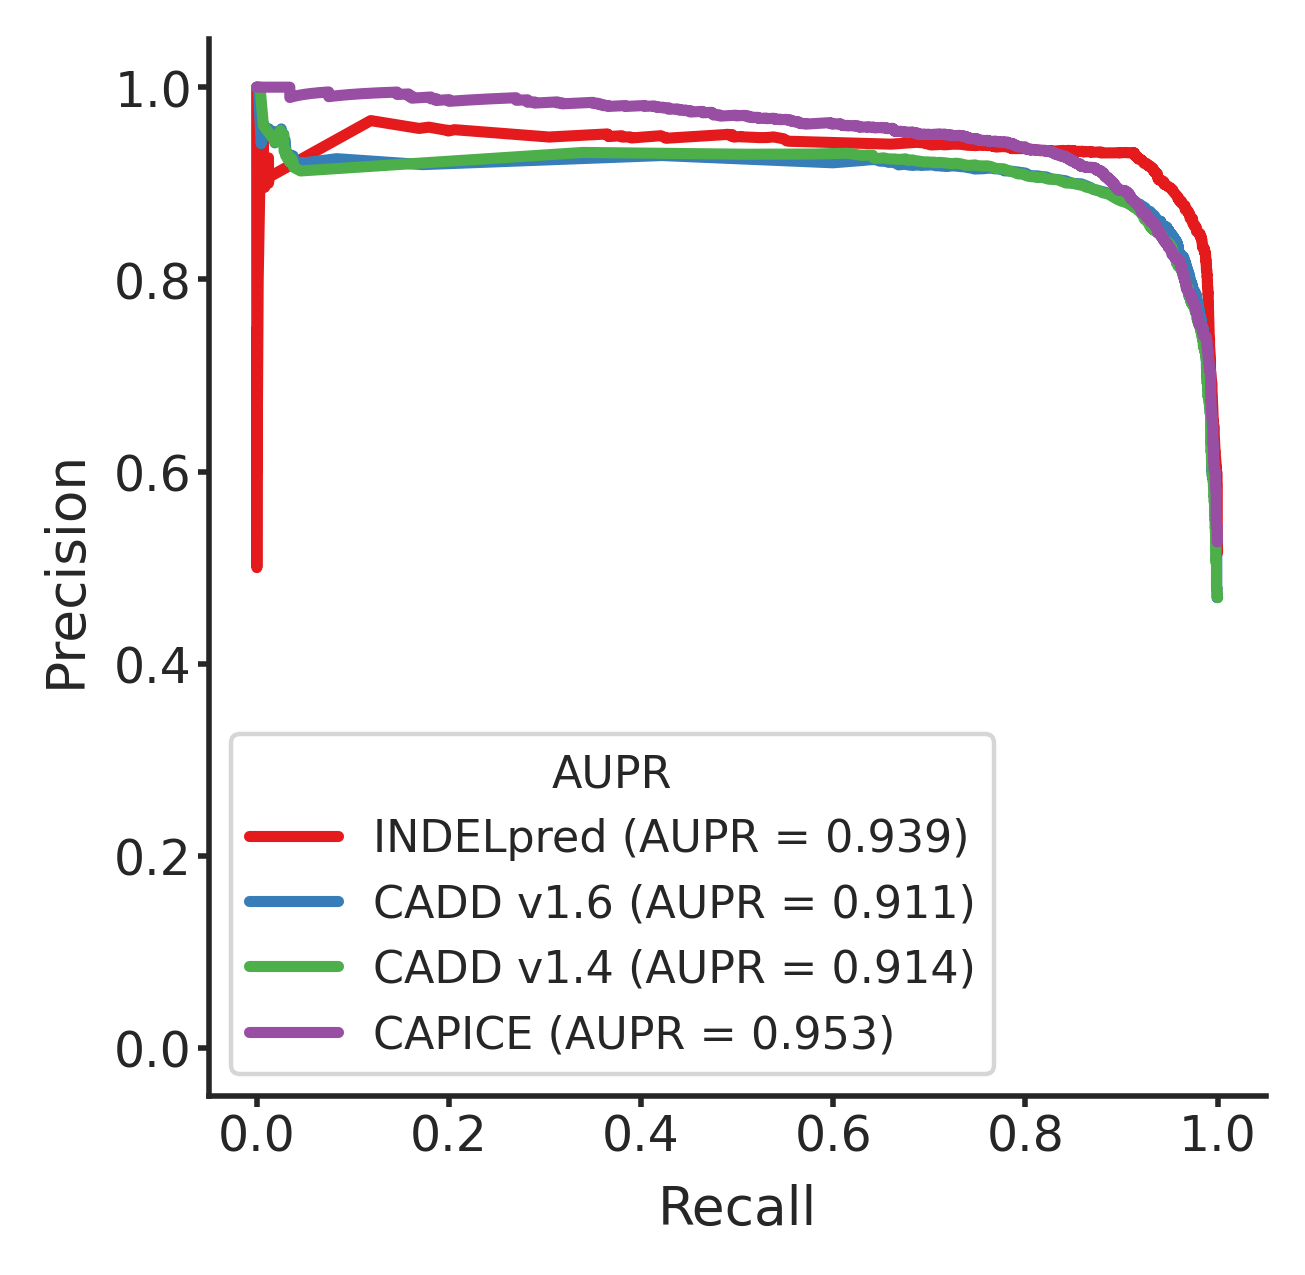

In [53]:
#palette  = dict({'INDELpred':"#e41a1c", 'CADD v1.6':"#377eb8", 'CADD v1.4':"#4daf4a", 'CAPICE':"#984ea3"})
import matplotlib.pyplot as plt
import seaborn as sns
fig, axs = plt.subplots(1,1,figsize=(3.5,3.5))
axs.plot(recall_our, pre_our,  label='INDELpred (AUPR = %0.3f)' % aps_our,lw=2,color="#e41a1c")
axs.plot(recall_cadd16, pre_cadd16,  label='CADD v1.6 (AUPR = %0.3f)' % aps_cadd16,lw=2,color="#377eb8")
axs.plot(recall_cadd14, pre_cadd14,  label='CADD v1.4 (AUPR = %0.3f)' % aps_cadd14,lw=2,color="#4daf4a")
axs.plot(recall_capice, pre_capice,  label='CAPICE (AUPR = %0.3f)' % aps_capice,lw=2,color="#984ea3")
axs.set_xlabel('Recall')
axs.set_ylabel('Precision')
axs.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
)
sns.despine()
axs.set_aspect('equal','box')
axs.legend(loc="lower left",title='AUPR',title_fontsize=8,fontsize=8)#,frameon=False)

axs.tick_params(direction='out', length=2, pad=1, width=1)
plt.savefig("Fig20220315/Fig2_all_pr.pdf", format='pdf', dpi=400, bbox_inches='tight')

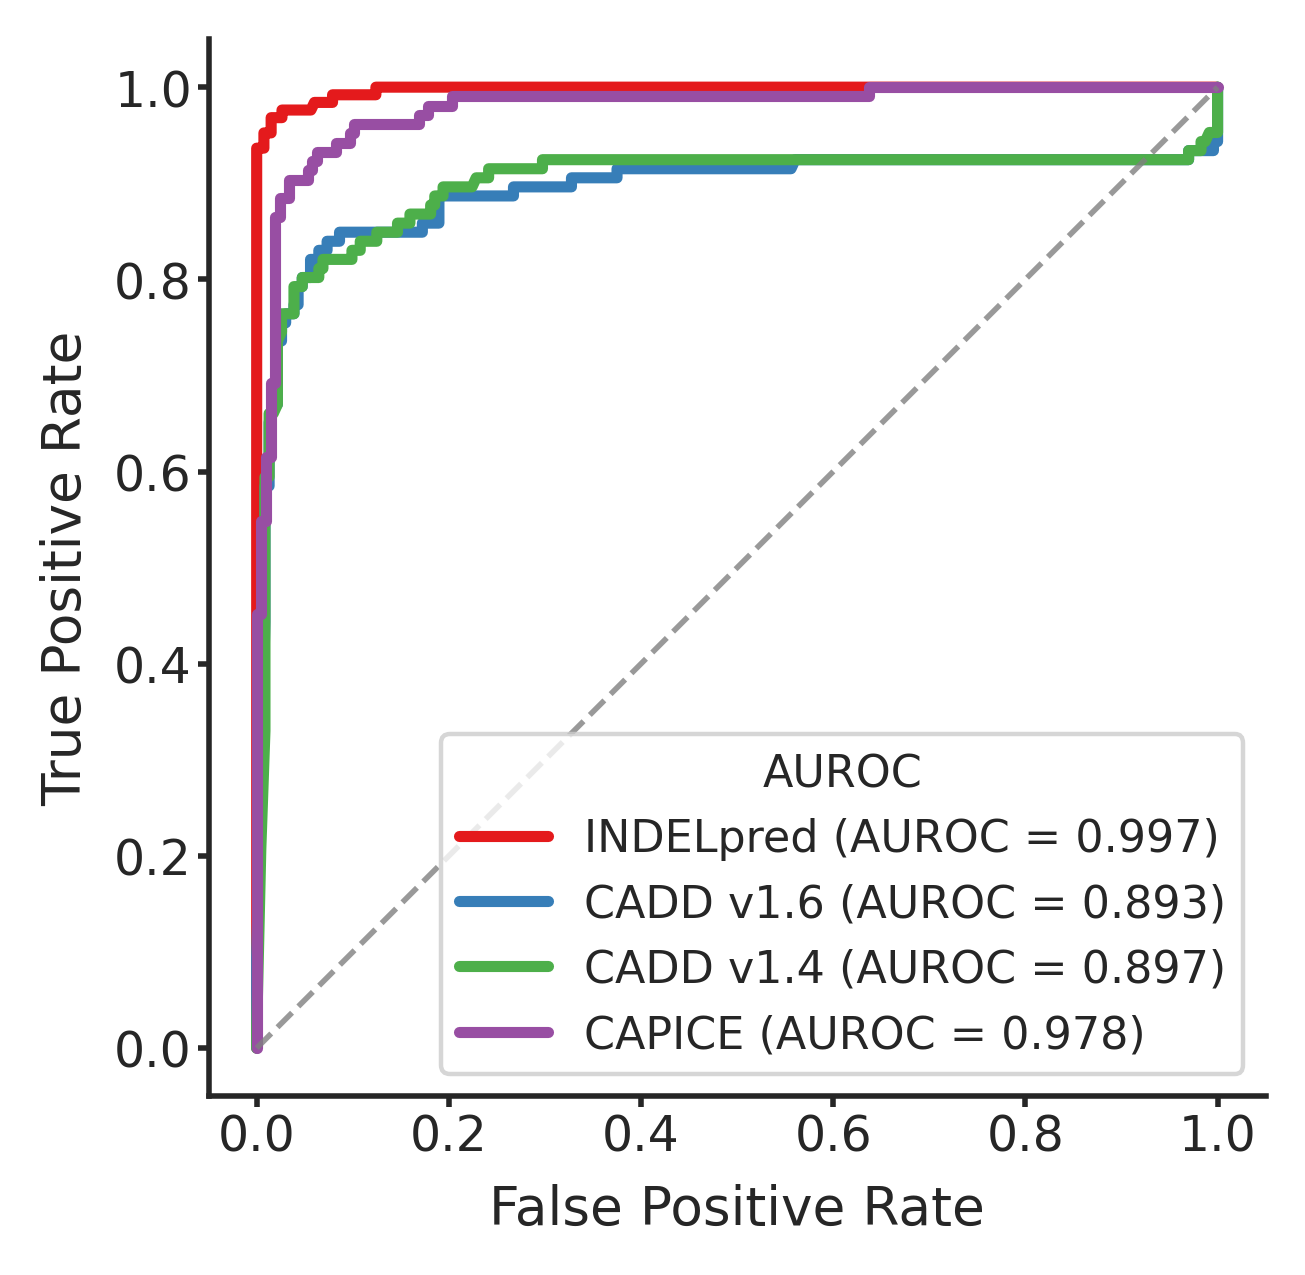

In [54]:
#palette  = dict({'INDELpred':"#e41a1c", 'CADD v1.6':"#377eb8", 'CADD v1.4':"#4daf4a", 'CAPICE':"#984ea3"})
import matplotlib.pyplot as plt
import seaborn as sns
fig, axs = plt.subplots(1,1,figsize=(3.5,3.5))
axs.plot(fpr_our2, tpr_our2, label='INDELpred (AUROC = %0.3f)' % auc_our2,lw=2,color="#e41a1c")
axs.plot(fpr_cadd162, tpr_cadd162, label='CADD v1.6 (AUROC = %0.3f)' % auc_cadd162,lw=2,color="#377eb8")
axs.plot(fpr_cadd142, tpr_cadd142, label='CADD v1.4 (AUROC = %0.3f)' % auc_cadd142,lw=2,color="#4daf4a")
axs.plot(fpr_capice2, tpr_capice2, label='CAPICE (AUROC = %0.3f)' % auc_capice2,lw=2,color="#984ea3")

axs.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=.8)
axs.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
)
sns.despine()
axs.set_aspect('equal','box')
axs.legend(loc="lower right",title='AUROC',title_fontsize=8,fontsize=8)#,frameon=False)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
axs.tick_params(direction='out', length=2, pad=1, width=1)
plt.savefig("Fig20220315/Fig2_high_auc.pdf", format='pdf', dpi=400, bbox_inches='tight')

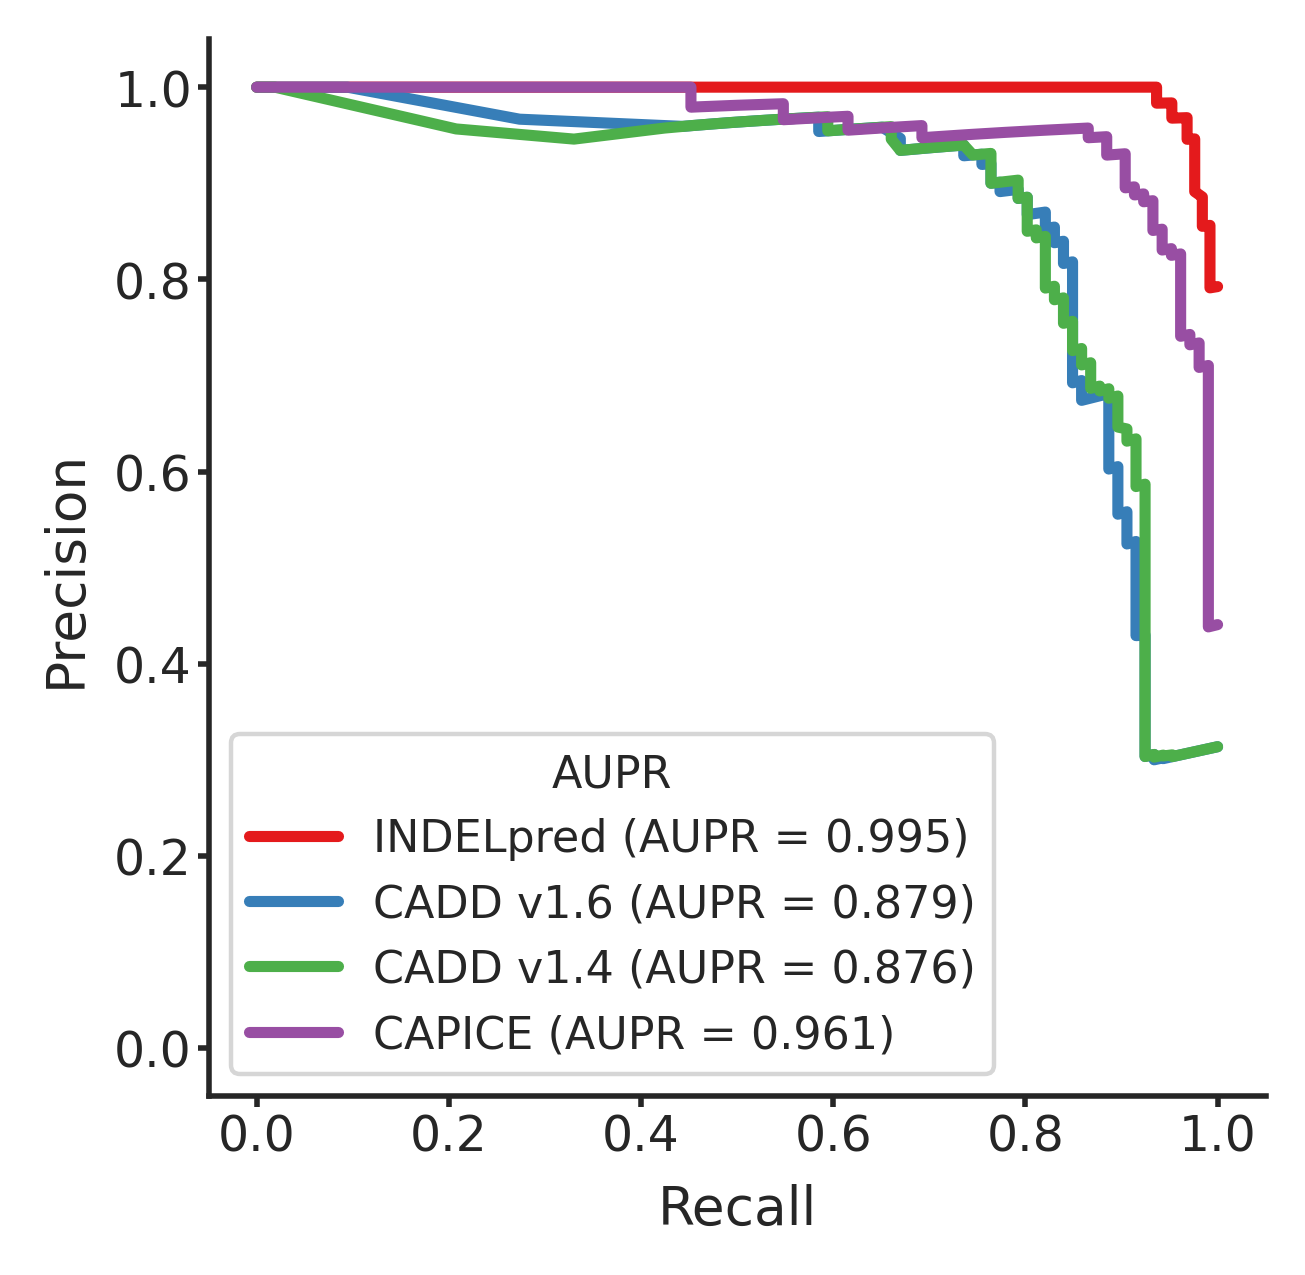

In [55]:
#palette  = dict({'INDELpred':"#e41a1c", 'CADD v1.6':"#377eb8", 'CADD v1.4':"#4daf4a", 'CAPICE':"#984ea3"})
import matplotlib.pyplot as plt
import seaborn as sns
fig, axs = plt.subplots(1,1,figsize=(3.5,3.5))

axs.plot(recall_our2, pre_our2,  label='INDELpred (AUPR = %0.3f)' % aps_our2,lw=2,color="#e41a1c")
axs.plot(recall_cadd162, pre_cadd162,  label='CADD v1.6 (AUPR = %0.3f)' % aps_cadd162,lw=2,color="#377eb8")
axs.plot(recall_cadd142, pre_cadd142,  label='CADD v1.4 (AUPR = %0.3f)' % aps_cadd142,lw=2,color="#4daf4a")
axs.plot(recall_capice2, pre_capice2,  label='CAPICE (AUPR = %0.3f)' % aps_capice2,lw=2,color="#984ea3")

axs.set_xlabel('Recall')
axs.set_ylabel('Precision')
axs.legend(loc="lower left")

axs.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
)

sns.despine()
axs.set_aspect('equal','box')
axs.legend(loc="lower left",title='AUPR',title_fontsize=8,fontsize=8)#,frameon=False)

axs.tick_params(direction='out', length=2, pad=1, width=1)
plt.savefig("Fig20220315/Fig2_high_pr.pdf", format='pdf', dpi=400, bbox_inches='tight')

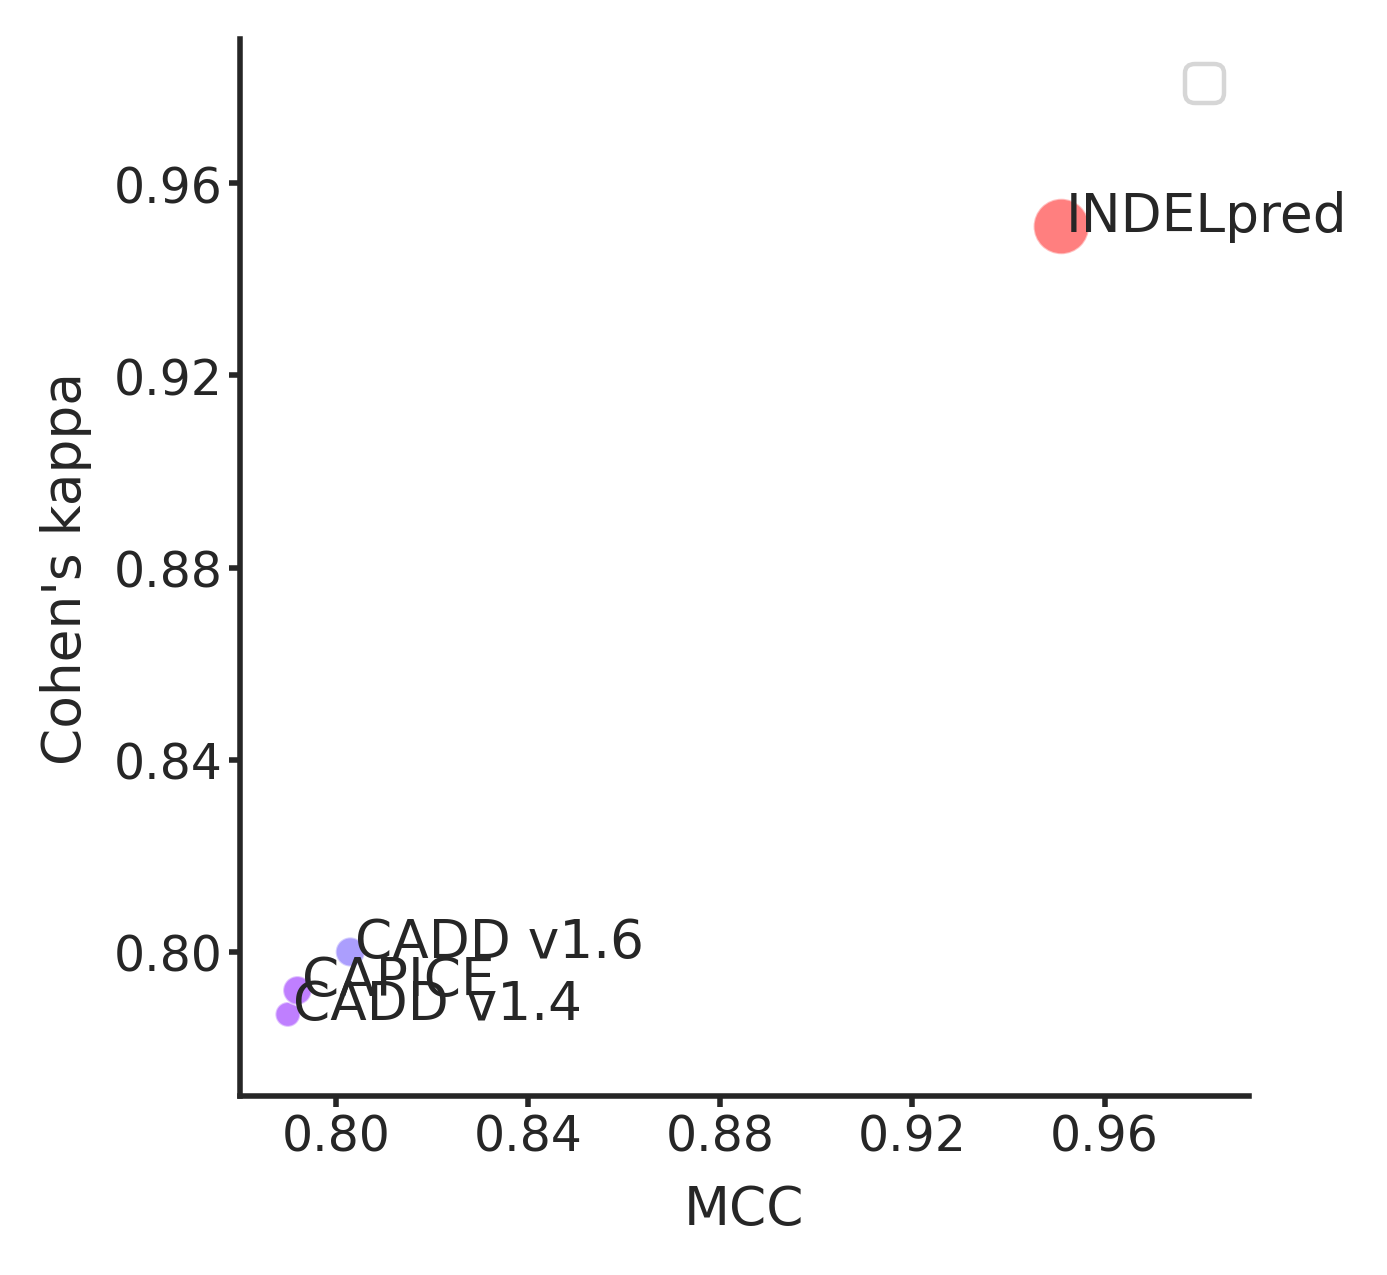

In [69]:
fig, axs = plt.subplots(1,1,figsize=(3.5,3.5))
sns.scatterplot(
    x=matrix['MCC'],
    y=matrix['Cohen\'s kappa'],
    size=matrix['F1'],
    hue=matrix['balanced accuracy'],
    palette='rainbow',
    alpha=0.5, sizes=(20, 100)
)
#plt.legend(loc='center right',fontsize=8 )
plt.legend('')
for i in range(len(matrix.index.to_list())):
    plt.annotate(matrix.index.to_list()[i],
                 xy=(matrix['MCC'][i],matrix['Cohen\'s kappa'][i]),
                 xytext=(matrix['MCC'][i]+0.001,matrix['Cohen\'s kappa'][i]-0.001)
                )
plt.ylim(0.77,0.99)
plt.xlim(0.78,0.99)

import matplotlib.ticker as ticker
axs.xaxis.set_major_locator(ticker.MultipleLocator(0.04))
axs.yaxis.set_major_locator(ticker.MultipleLocator(0.04))
plt.xlabel("MCC")
plt.ylabel("Cohen\'s kappa")
sns.despine()
axs.set_aspect('equal','box')

#axs.legend(loc="lower right",title='AUROC',title_fontsize=8,fontsize=8)#,frameon=False)

axs.tick_params(direction='out', length=2, pad=1, width=1)


plt.savefig("Fig20220315/Fig2_all_mcc.pdf", format='pdf', dpi=400, bbox_inches='tight')

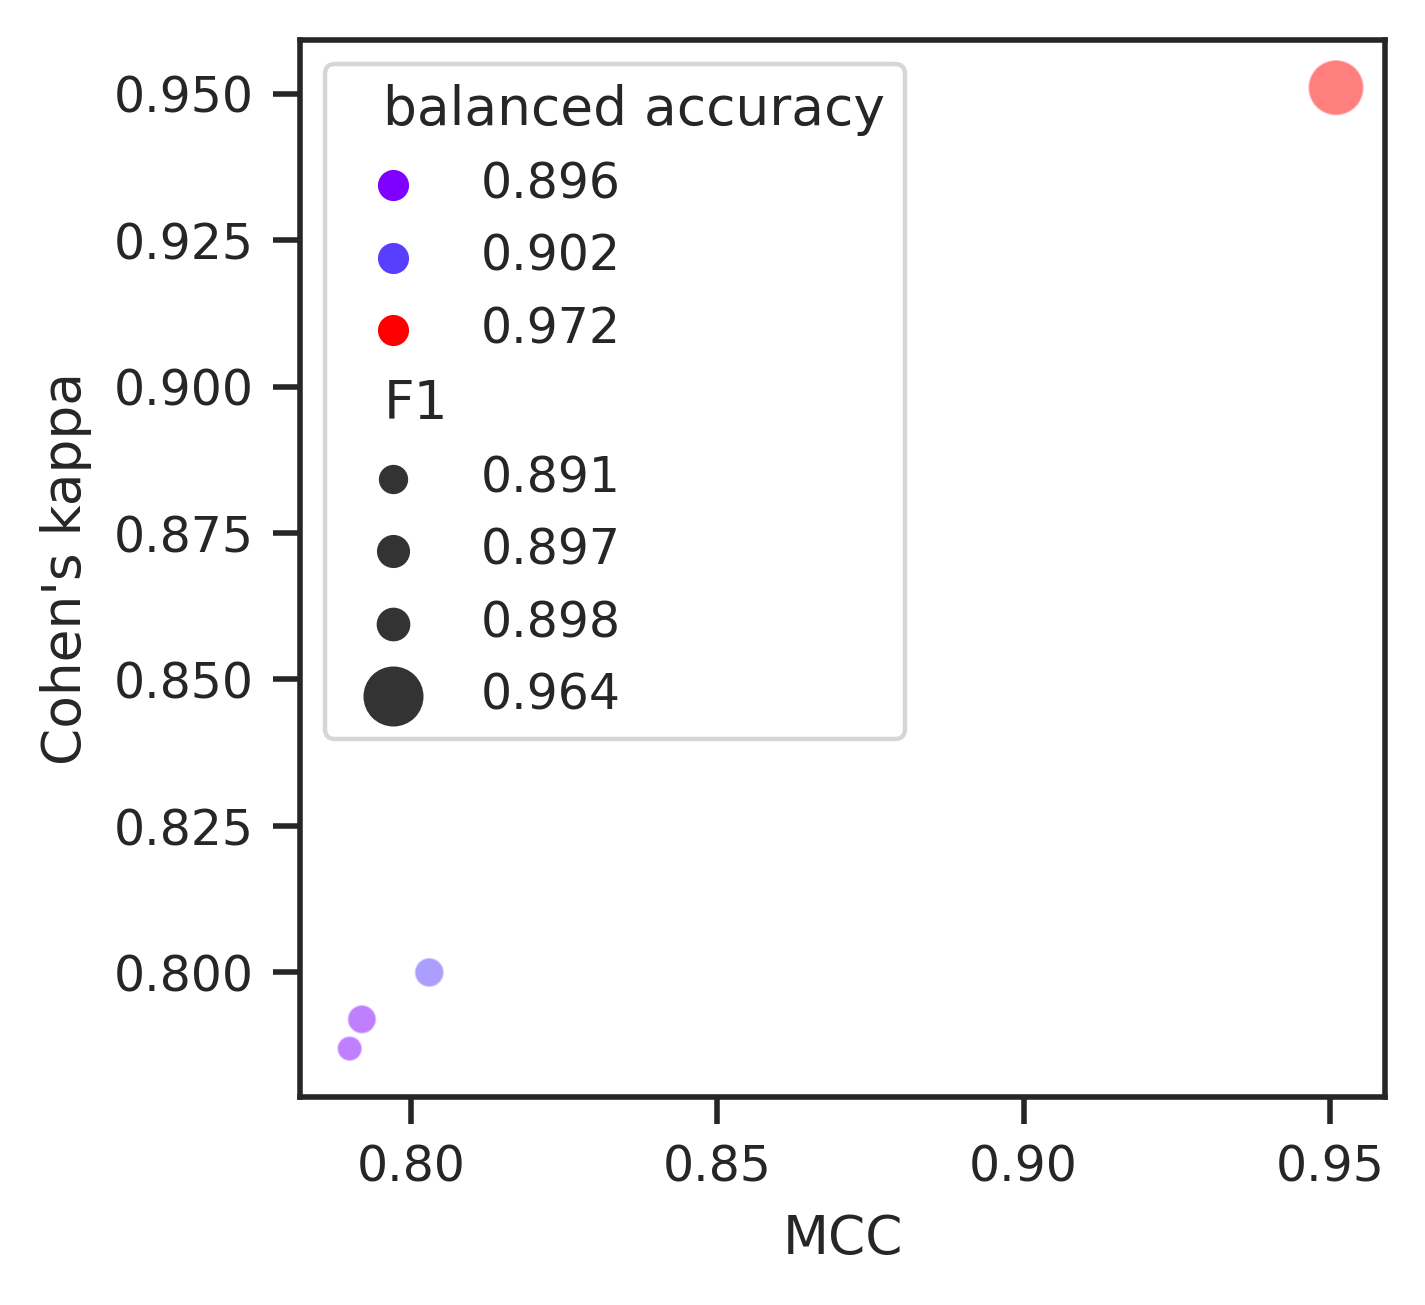

In [91]:
fig, axs = plt.subplots(1,1,figsize=(3.5,3.5))
sns.scatterplot(
    x=matrix['MCC'],
    y=matrix['Cohen\'s kappa'],
    size=matrix['F1'],
    hue=matrix['balanced accuracy'],
    palette='rainbow',
    alpha=0.5, sizes=(20, 100)
)
# plt.scatter(x=matrix['MCC'], y=matrix['balanced accuracy'], cmap="rainbow") 
# plt.colorbar(label="color", orientation="horizontal")
# sns.palplot(sns.color_palette("rainbow", 100))
plt.savefig("Fig20220315/Fig2_legend1.pdf", format='pdf', dpi=400, bbox_inches='tight')

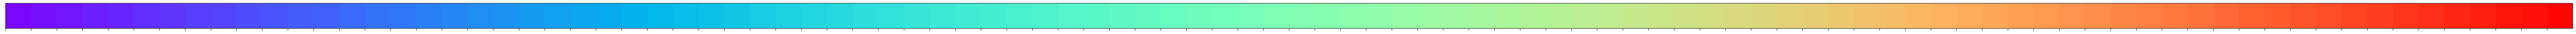

In [94]:
# sns.palplot(sns.color_palette("rainbow", 100))

sns.palplot(sns.color_palette("rainbow", 100))
plt.savefig("Fig20220315/Fig2_legend2.pdf", format='pdf', dpi=400, bbox_inches='tight')

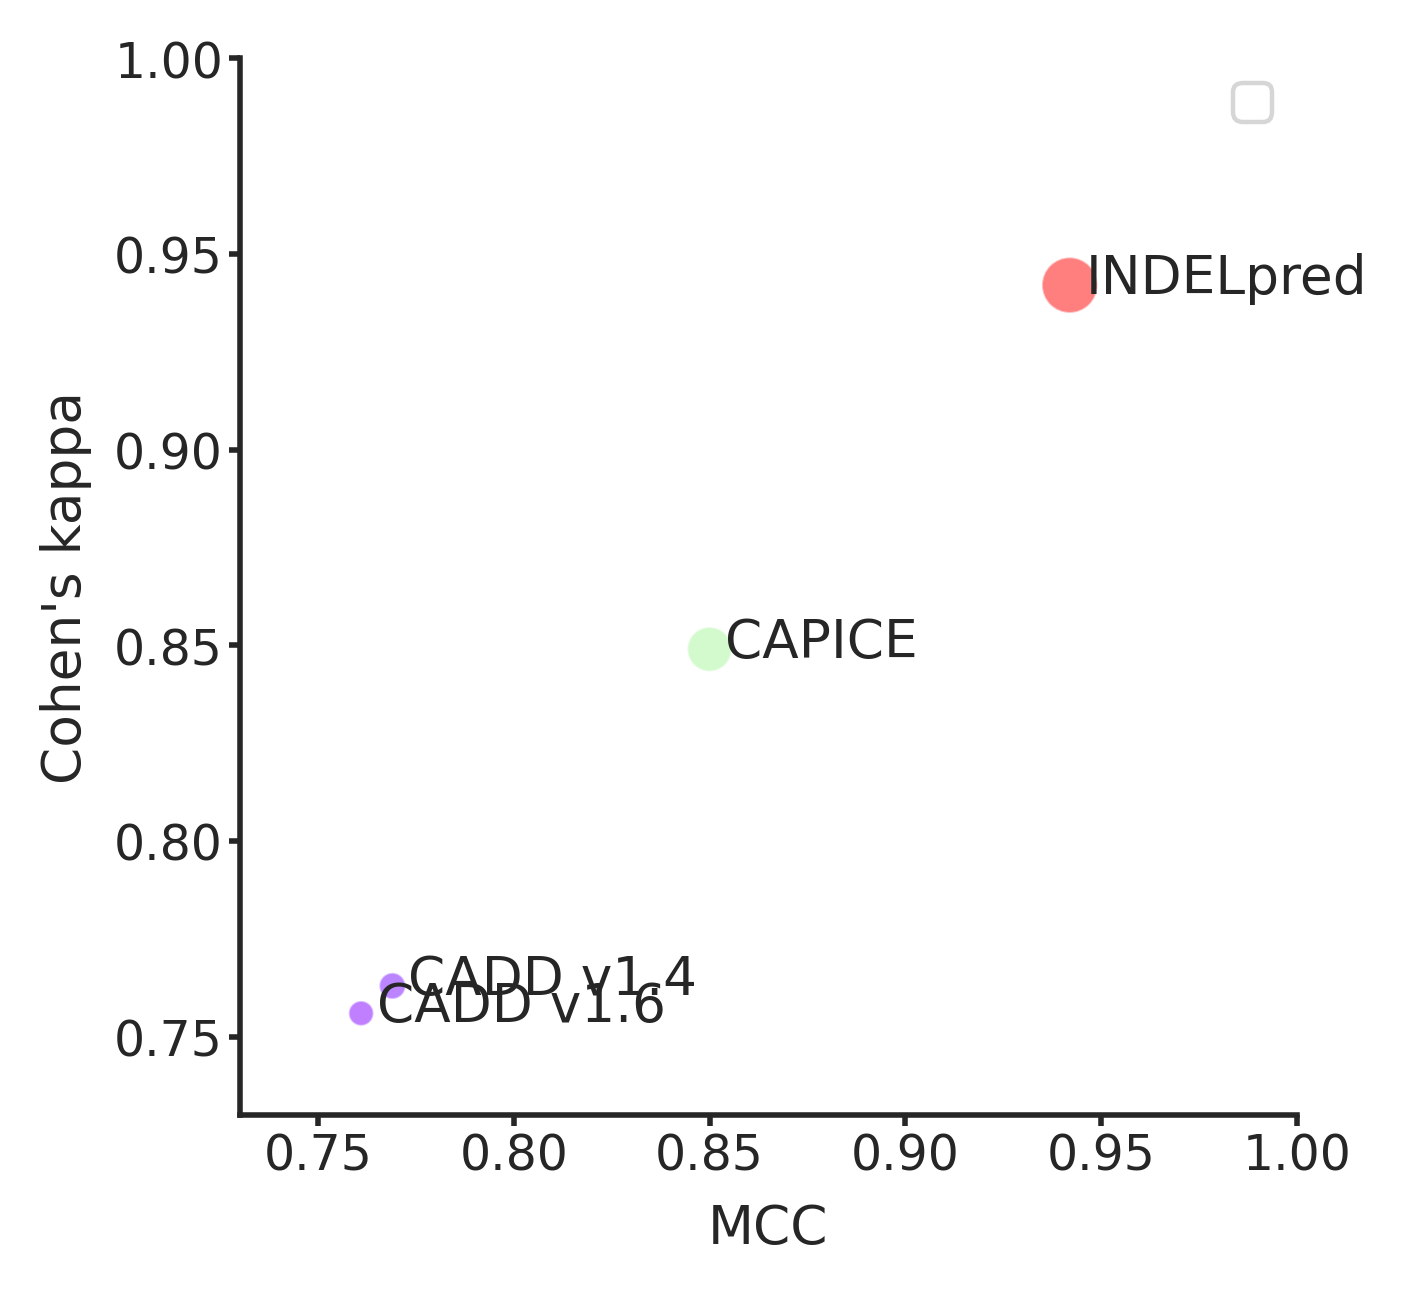

In [70]:
fig, axs = plt.subplots(1,1,figsize=(3.5,3.5))
sns.scatterplot(
    x=matrix2['MCC'],
    y=matrix2['Cohen\'s kappa'],
    size=matrix2['F1'],
    hue=matrix2['balanced accuracy'],
    palette='rainbow',
    alpha=0.5, sizes=(20, 100)
)
#plt.legend(loc='center right',fontsize=8 )
plt.legend('')
for i in range(len(matrix2.index.to_list())):
    plt.annotate(matrix2.index.to_list()[i],
                 xy=(matrix2['MCC'][i],matrix2['Cohen\'s kappa'][i]),
                 xytext=(matrix2['MCC'][i]+0.004,matrix2['Cohen\'s kappa'][i]-0.002)
                )
plt.xlim(0.73,1)
plt.ylim(0.73,1)
import matplotlib.ticker as ticker
axs.xaxis.set_major_locator(ticker.MultipleLocator(0.05))
axs.yaxis.set_major_locator(ticker.MultipleLocator(0.05))

plt.xlabel("MCC")
plt.ylabel("Cohen\'s kappa")

sns.despine()
axs.set_aspect('equal','box')

#axs.legend(loc="lower right",title='AUROC',title_fontsize=8,fontsize=8)#,frameon=False)

axs.tick_params(direction='out', length=2, pad=1, width=1)
plt.savefig("Fig20220315/Fig2_high_mcc.pdf", format='pdf', dpi=400, bbox_inches='tight')

<AxesSubplot:xlabel='MCC', ylabel="Cohen's kappa">

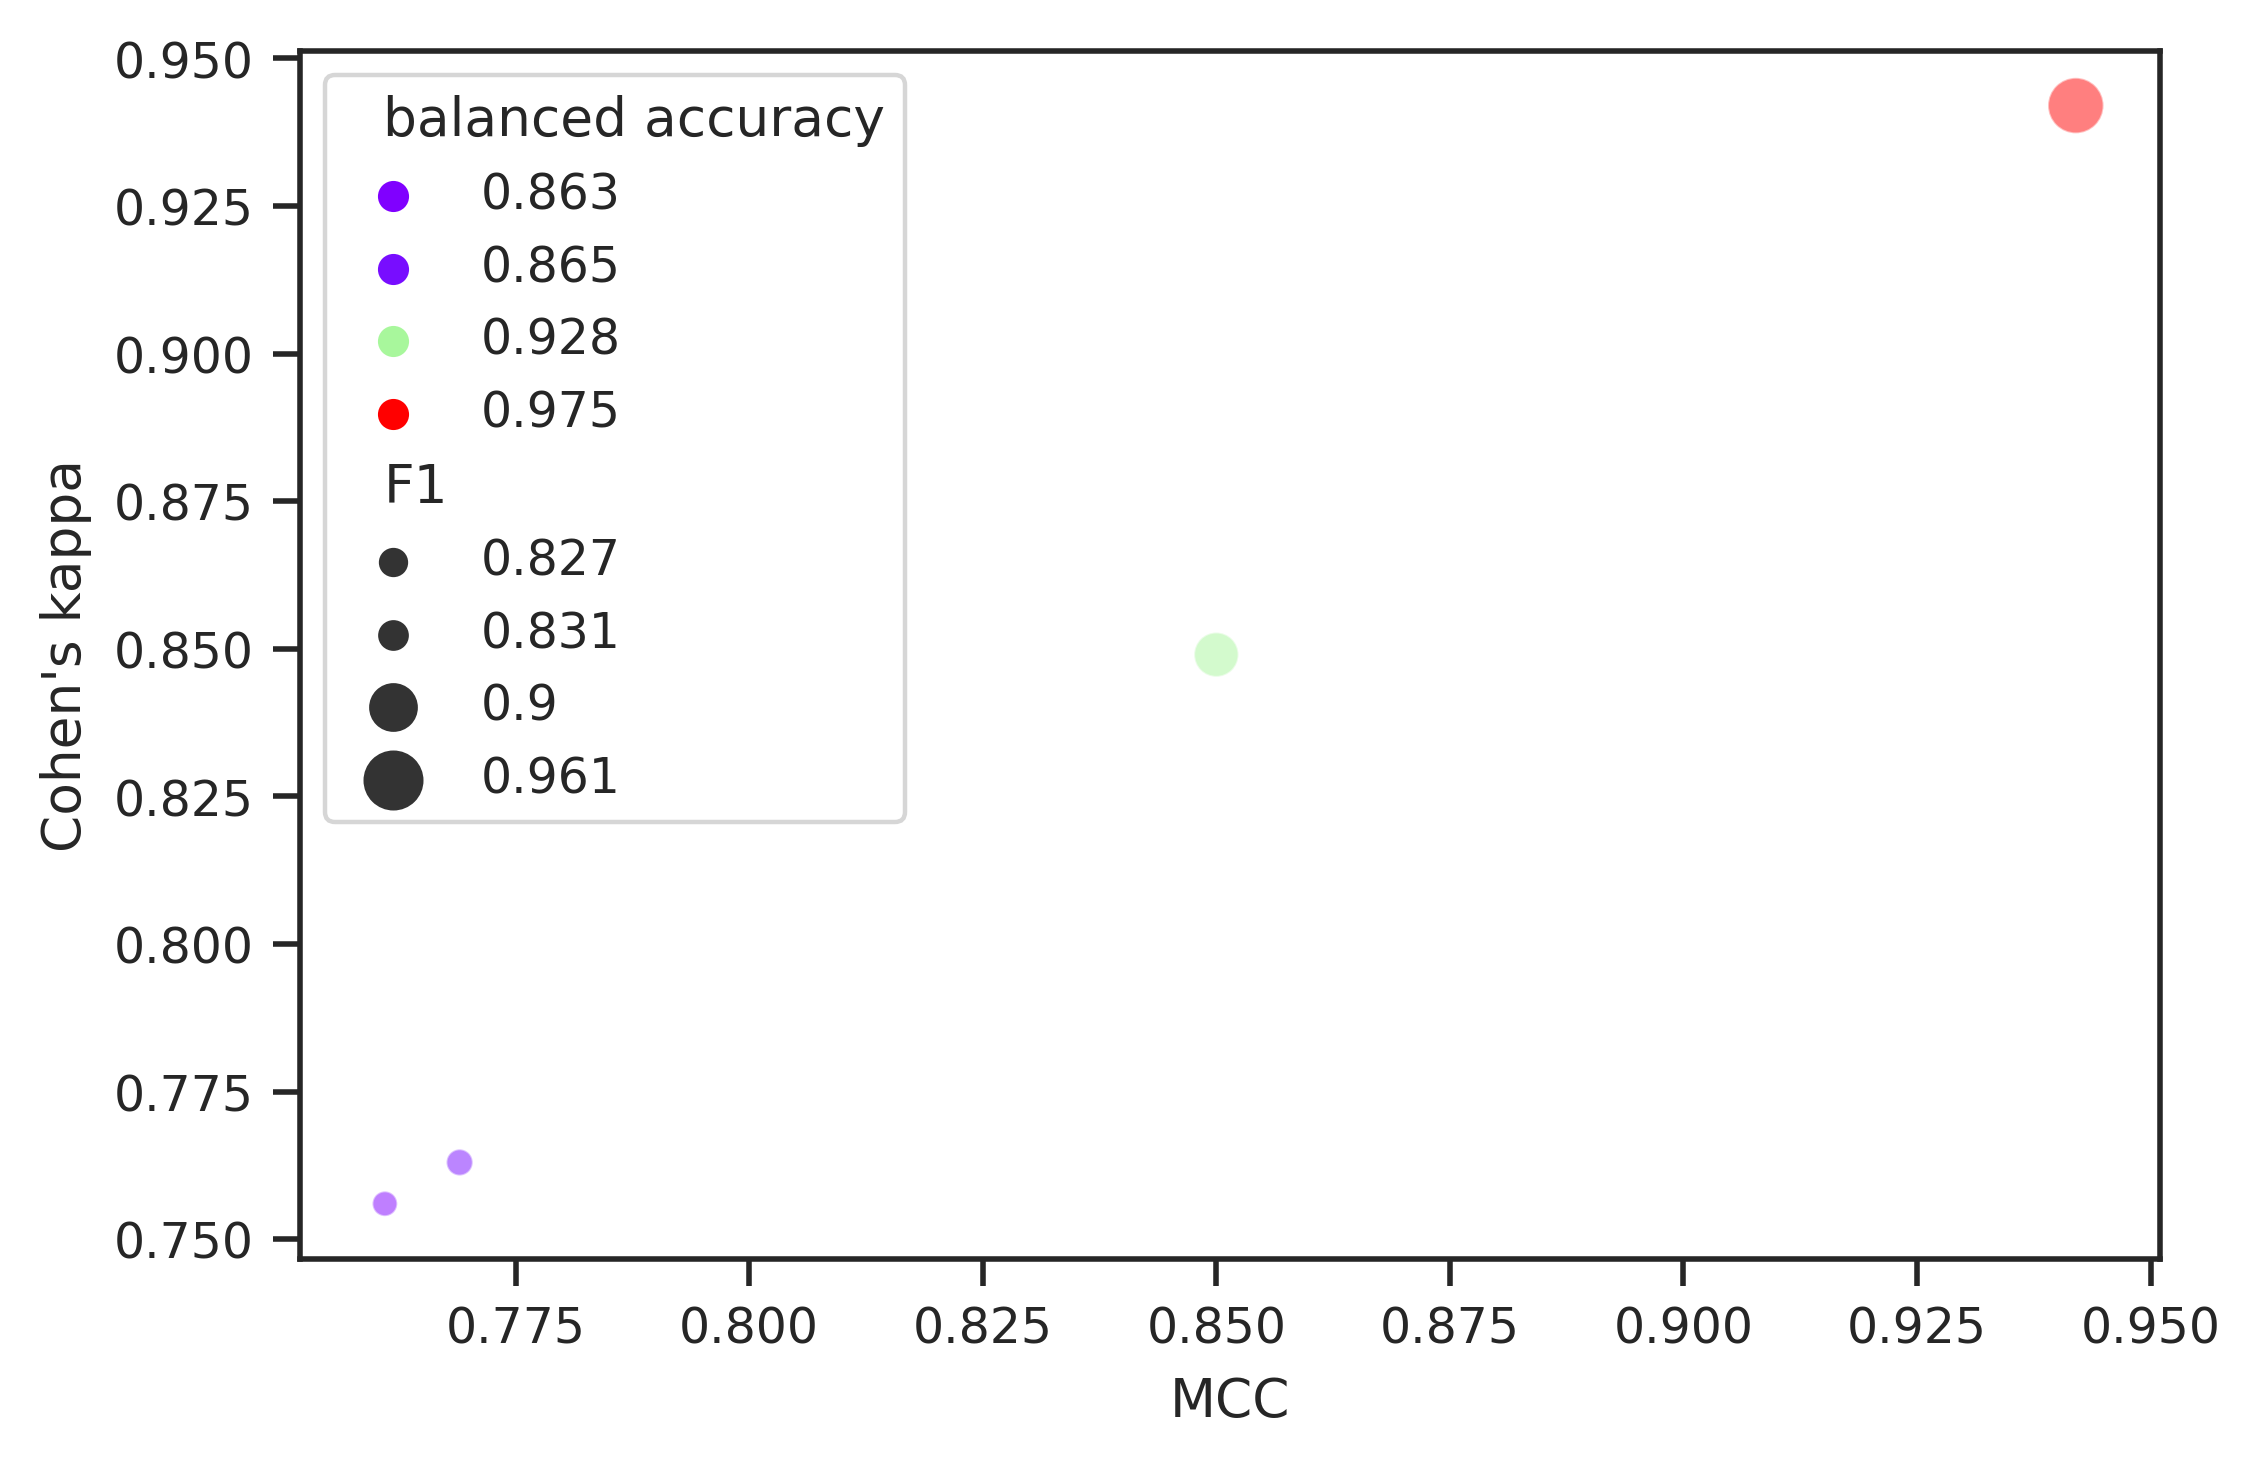

In [95]:
sns.scatterplot(
    x=matrix2['MCC'],
    y=matrix2['Cohen\'s kappa'],
    size=matrix2['F1'],
    hue=matrix2['balanced accuracy'],
    palette='rainbow',
    alpha=0.5, sizes=(20, 100)
)

In [26]:
matrix['Storage'] = ['7.8G','100G-1T','100G-1T','100G-1T']
matrix['RAM'] = ['1G','12G','12G','12G']
matrix['Runtime'] = ['7m','889m','1378m','1378m']

matrix[['Storage','RAM','Runtime']]

,Storage,RAM,Runtime
INDELpred,7.8G,1G,7m
CADD v1.6,100G-1T,12G,889m
CADD v1.4,100G-1T,12G,1378m
CAPICE,100G-1T,12G,1378m


#### af

In [13]:
def resample_benchmark(data):
    iter=20
    
    auc_our_list=[]
    auc_cadd16_list=[]
    auc_cadd14_list=[]
    auc_capice_list=[]
    from sklearn.utils import resample
    for i in range(iter):
        sub_samples = resample(data, n_samples=int(data.shape[0]*0.8), 
                               replace=1,random_state = i,
                              stratify=data['tag'])
        try:
            auc_our = auc_all(sub_samples['tag'],sub_samples['INDELpred_score'],cut_off)
        except:
            auc_our = np.nan
        auc_our_list.append(auc_our)
        try:
            auc_cadd16= auc_all(sub_samples['tag'],sub_samples['PHRED_v16'],20)
        except:
            auc_cadd16=np.nan
        auc_cadd16_list.append(auc_cadd16)
        try:
            auc_cadd14 = auc_all(sub_samples['tag'],sub_samples['PHRED_v14'],20)
        except:
            auc_cadd14 = np.nan
        auc_cadd14_list.append(auc_cadd14)
        try:
            auc_capice = auc_all(sub_samples['tag'],sub_samples['capice_p'],0.02)
        except:
            auc_capice = np.nan
        auc_capice_list.append(auc_capice)
    

    matrix = pd.concat([
        pd.concat([pd.DataFrame(['INDELpred']*20,columns=['tool']),
                   pd.DataFrame(auc_our_list,columns=['auc'])],axis=1),
        pd.concat([pd.DataFrame(['CADD v1.6']*20,columns=['tool']),
                   pd.DataFrame(auc_cadd16_list,columns=['auc'])],axis=1),
        pd.concat([pd.DataFrame(['CADD v1.4']*20,columns=['tool']),
                   pd.DataFrame(auc_cadd14_list,columns=['auc'])],axis=1),
        pd.concat([pd.DataFrame(['CAPICE']*20,columns=['tool']),
                   pd.DataFrame(auc_capice_list,columns=['auc'])],axis=1),
        
    ],axis=0)

#     print(int(data.shape[0]))
#     print(data['tag'].value_counts())
    return matrix

       

In [240]:
##AF
#<=0
#0-0.0001
#0.0001 0.001
#>0.001
merge_af_sub0 = resample_benchmark(merge_df[merge_df['af']<=0])
# merge_af_sub1 = resample_benchmark(merge_df[(merge_df['[16]gnomAD_genome_ALL']>0) & (merge_df['[16]gnomAD_genome_ALL']<=0.0001)])
merge_af_sub2 = resample_benchmark(merge_df[(merge_df['af']>0) & (merge_df['af']<=0.001)])
merge_af_sub3 = resample_benchmark(merge_df[(merge_df['af']>0.001) & (merge_df['af']<=0.01)])
# merge_af_sub4 = resample_benchmark(merge_df[(merge_df['[16]gnomAD_genome_ALL']>0.001) & (merge_df['[16]gnomAD_genome_ALL']<=0.01)])

# merge_af_sub4 = resample_benchmark(merge_df[merge_df['[16]gnomAD_genome_ALL']>0.01])
merge_af_sub0['AF']=['0']*80
# merge_af_sub1['AF']=['0-0.01%']*80
merge_af_sub2['AF']=['0-0.1%']*80
merge_af_sub3['AF']=['0.1%-1%']*80
# merge_af_sub4['AF']=['0.0.1%-1%']*80
merge_af_sub = pd.concat([merge_af_sub0,merge_af_sub2,merge_af_sub3,],axis=0)

10162
1.0    7917
0.0    2245
Name: tag, dtype: int64
306
0.0    248
1.0     58
Name: tag, dtype: int64
747
0.0    722
1.0     25
Name: tag, dtype: int64


In [14]:
from matplotlib.patches import PathPatch

def adjust_box_widths(g, fac):
    """
    Adjust the withs of a seaborn-generated boxplot.
    """

    # iterating through Axes instances
    for ax in g.axes:

        # iterating through axes artists:
        for c in ax.get_children():

            # searching for PathPatches
            if isinstance(c, PathPatch):
                # getting current width of box:
                p = c.get_path()
                verts = p.vertices
                verts_sub = verts[:-1]
                xmin = np.min(verts_sub[:, 0])
                xmax = np.max(verts_sub[:, 0])
                xmid = 0.5*(xmin+xmax)
                xhalf = 0.5*(xmax - xmin)

                # setting new width of box
                xmin_new = xmid-fac*xhalf
                xmax_new = xmid+fac*xhalf
                verts_sub[verts_sub[:, 0] == xmin, 0] = xmin_new
                verts_sub[verts_sub[:, 0] == xmax, 0] = xmax_new

                # setting new width of median line
                for l in ax.lines:
                    if np.all(l.get_xdata() == [xmin, xmax]):
                        l.set_xdata([xmin_new, xmax_new])


<ipython-input-191-5ccb116a2a84>:33: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if np.all(l.get_xdata() == [xmin, xmax]):


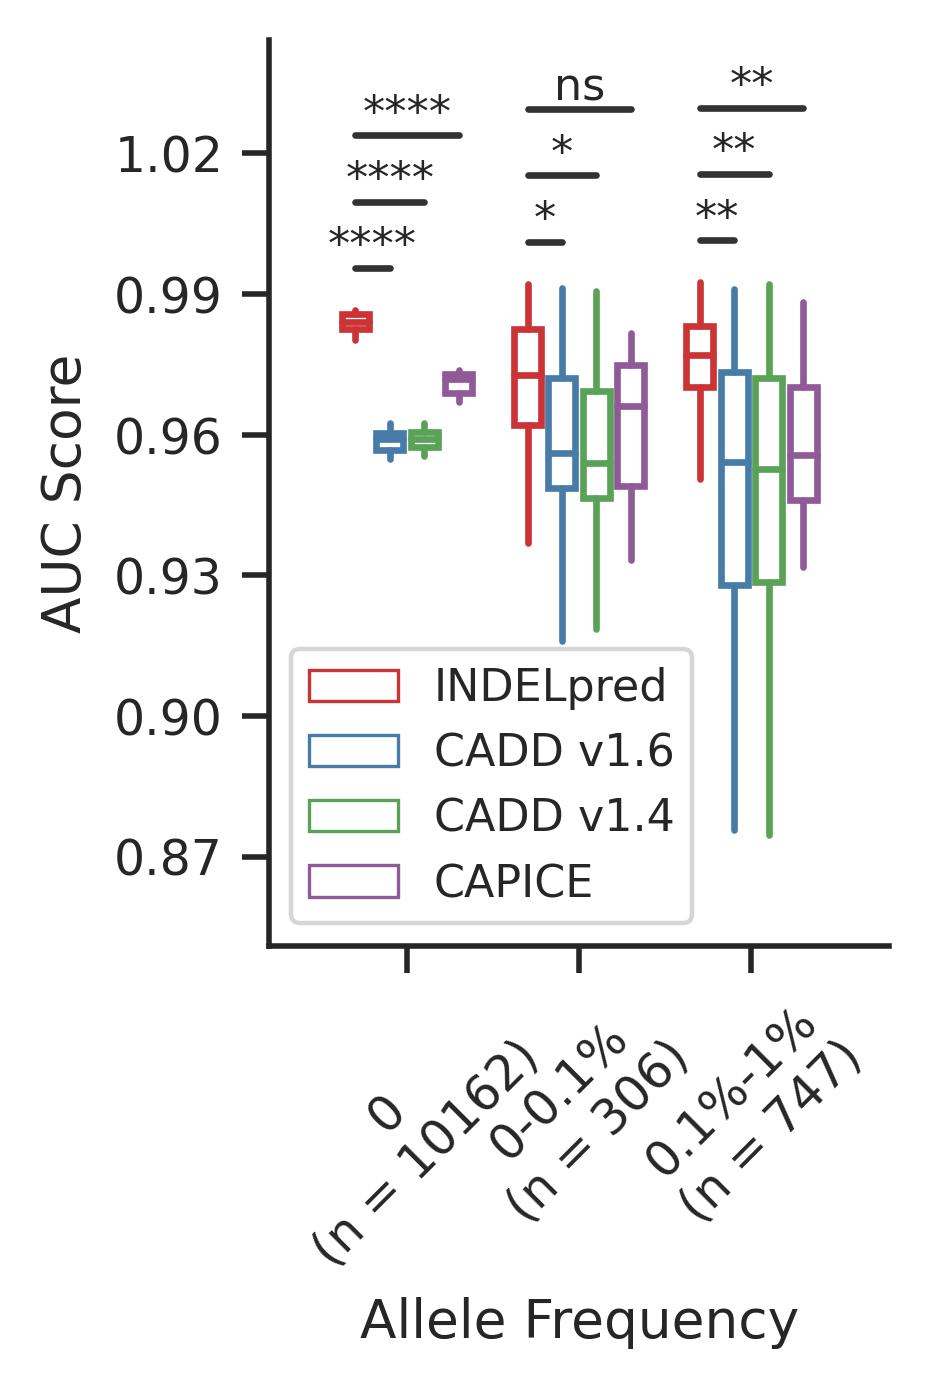

In [270]:
fig, ax = plt.subplots(1,1,figsize=(2,3))
palette  = dict({'INDELpred':"#e41a1c", 'CADD v1.6':"#377eb8", 'CADD v1.4':"#4daf4a", 'CAPICE':"#984ea3"})


pairs=[
                                       (('0', "INDELpred"), ("0", "CADD v1.6")),
                                       (('0', "INDELpred"), ("0", "CADD v1.4")),
                                       (('0', "INDELpred"), ("0", "CAPICE")),
                                       
                                        (('0-0.1%', "INDELpred"), ("0-0.1%", "CADD v1.6")),
                                       (('0-0.1%', "INDELpred"), ("0-0.1%", "CADD v1.4")),
                                       (('0-0.1%', "INDELpred"), ("0-0.1%", "CAPICE")),
                                                                      
                                       (('0.1%-1%', "INDELpred"), ("0.1%-1%", "CADD v1.6")),
                                       (('0.1%-1%', "INDELpred"), ("0.1%-1%", "CADD v1.4")),
                                       (('0.1%-1%', "INDELpred"), ("0.1%-1%", "CAPICE")),
                                       
                                   ]


ax = sns.boxplot(x="AF", y="auc", hue="tool",data=merge_af_sub, palette=palette,
                 showfliers=False,showcaps = False,
                 )#orient='h'
ax.legend(loc="lower left",title='',title_fontsize=8,fontsize=8)
# ax = adjust_box_widths(ax, 0.9)
for i,artist in enumerate(ax.artists):
    # Set the linecolor on the artist to the facecolor, and set the facecolor to None
    col = artist.get_facecolor()
    artist.set_edgecolor(col)
    artist.set_facecolor('None')

    # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same colour as above
    for j in range(i*3,i*3+3):
        line = ax.lines[j]
        line.set_color(col)
        line.set_mfc(col)
        line.set_mec(col)

# Also fix the legend
for legpatch in ax.get_legend().get_patches():
    col = legpatch.get_facecolor()
    legpatch.set_edgecolor(col)
    legpatch.set_facecolor('None')
    
ax.set_ylim(0.851,1)
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.03))
from statannotations.Annotator import Annotator

annotator=Annotator(ax=ax, pairs=pairs,x="AF", y="auc", hue="tool",data=merge_af_sub)
annotator.configure(test='Mann-Whitney', text_format='star', #loc='outside',
                   verbose=False,line_width=1.2,fontsize=8,line_height=0, 
                    text_offset=0,line_offset=0)#loc='outside'
#verbose=False,line_width=1.2,fontsize=8,loc='inside',line_height=0, text_offset=1
annotator.new_plot(ax,pairs=pairs,x="AF", y="auc", hue="tool",data=merge_af_sub)#orient='h'
annotator.apply_and_annotate()

ax.set_xlabel('Allele Frequency')
ax.set_ylabel('AUC Score')
#ax.axes.get_xaxis().set_visible(False)
sns.despine()
adjust_box_widths(fig, 0.8)
# plt.grid(color='0.95')

plt.xticks([0,1,2],['0'+'\n'+'(n = 10162)',
                    '0-0.1%' + '\n' + '(n = 306)',
                    '0.1%-1%'+'\n'+'(n = 747)'],rotation=45)


plt.savefig("Fig20220315/Fig3_boxplot_af.pdf", format='pdf', dpi=400, bbox_inches='tight')

#### func

In [152]:
set(x_test1_func.values),set(x_test1_exonic_func.values),

({'UTR3',
  'UTR5',
  'downstream',
  'exonic',
  'exonic;splicing',
  'intergenic',
  'intronic',
  'ncRNA_UTR5',
  'ncRNA_exonic',
  'ncRNA_intronic',
  'ncRNA_splicing',
  'splicing',
  'upstream',
  'upstream;downstream'},
 {'.',
  'frameshift_deletion',
  'frameshift_insertion',
  'nonframeshift_deletion',
  'nonframeshift_insertion',
  'startloss',
  'stopgain',
  'stoploss',
  'unknown'})

In [380]:
func_list=['exonic','ncRNA','UTR','intronic','stream','intergenic']
num_list=[]
merge_func=pd.DataFrame()
for i,name in zip([['exonic','exonic;splicing'],
                   ['ncRNA_UTR5','ncRNA_exonic','ncRNA_intronic','ncRNA_splicing'],
                   ['UTR3','UTR5'],
                   ['intronic'],['downstream','upstream','upstream;downstream'],
                   ['intergenic']],func_list):
    #print('func ',i)
    num_list.append(merge_df[merge_df['func'].isin(i)].shape[0])
    func_sub_df = resample_benchmark(merge_df[merge_df['func'].isin(i)])
    func_sub_df['Func'] = [name]*80
    merge_func = pd.concat([merge_func,func_sub_df],axis=0)

exonicfunc_list=['deletion','insertion']
# merge_func=pd.DataFrame()
for i,name in zip([['frameshift_deletion','nonframeshift_deletion',],
                   ['frameshift_insertion','nonframeshift_insertion',]],exonicfunc_list):
    #print('func ',i)
    func_sub_df = resample_benchmark(merge_df[merge_df['exonic_func'].isin(i)])
    num_list.append(merge_df[merge_df['exonic_func'].isin(i)].shape[0])
    func_sub_df['Func'] = [name]*80
    merge_func = pd.concat([merge_func,func_sub_df],axis=0)

8307
1.0    7726
0.0     581
Name: tag, dtype: int64
662
0.0    651
1.0     11
Name: tag, dtype: int64
913
0.0    905
1.0      8
Name: tag, dtype: int64
19140
0.0    19098
1.0       42
Name: tag, dtype: int64
740
0.0    716
1.0     24
Name: tag, dtype: int64
27
1.0    20
0.0     7
Name: tag, dtype: int64
5351
1.0    5040
0.0     311
Name: tag, dtype: int64
2229
1.0    1987
0.0     242
Name: tag, dtype: int64


<ipython-input-191-5ccb116a2a84>:33: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if np.all(l.get_xdata() == [xmin, xmax]):


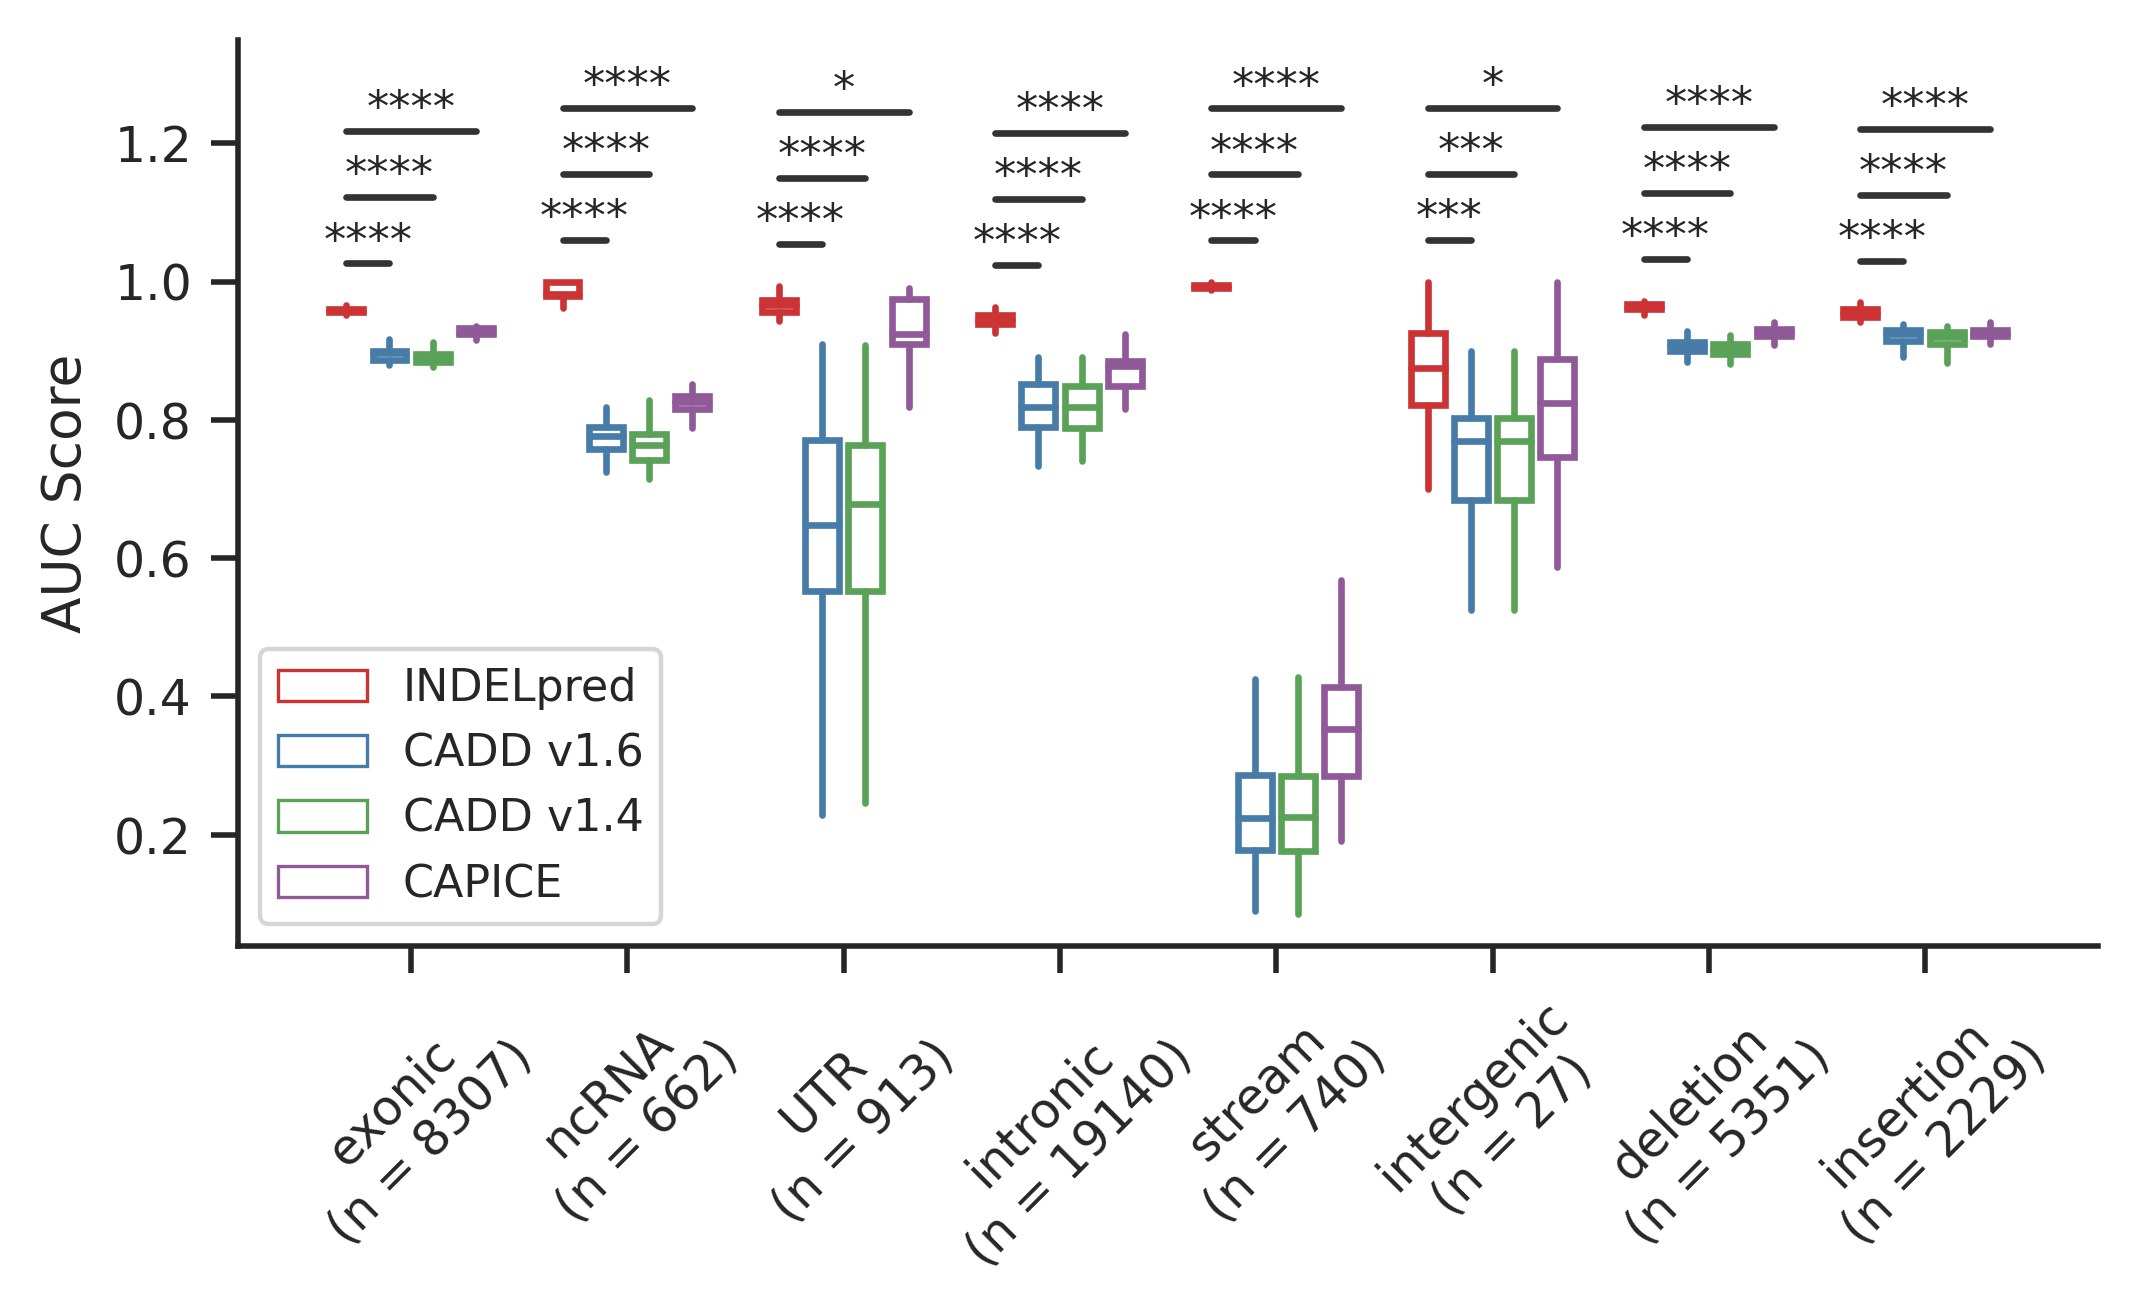

In [381]:
fig, ax = plt.subplots(1,1,figsize=(6,3))
pairs=[
                                       (('exonic', "INDELpred"), ("exonic", "CADD v1.6")),
                                       (('exonic', "INDELpred"), ("exonic", "CADD v1.4")),
                                       (('exonic', "INDELpred"), ("exonic", "CAPICE")),
                                       
                                        (('ncRNA', "INDELpred"), ("ncRNA", "CADD v1.6")),
                                       (('ncRNA', "INDELpred"), ("ncRNA", "CADD v1.4")),
                                       (('ncRNA', "INDELpred"), ("ncRNA", "CAPICE")),
                                       
                                       (('UTR', "INDELpred"), ("UTR", "CADD v1.6")),
                                       (('UTR', "INDELpred"), ("UTR", "CADD v1.4")),
                                       (('UTR', "INDELpred"), ("UTR", "CAPICE")),
                                       
                                       (('intronic', "INDELpred"), ("intronic", "CADD v1.6")),
                                       (('intronic', "INDELpred"), ("intronic", "CADD v1.4")),
                                       (('intronic', "INDELpred"), ("intronic", "CAPICE")),
                                       
                                       (('stream', "INDELpred"), ("stream", "CADD v1.6")),
                                       (('stream', "INDELpred"), ("stream", "CADD v1.4")),
                                       (('stream', "INDELpred"), ("stream", "CAPICE")),
                                       
                                       (('intergenic', "INDELpred"), ("intergenic", "CADD v1.6")),
                                       (('intergenic', "INDELpred"), ("intergenic", "CADD v1.4")),
                                       (('intergenic', "INDELpred"), ("intergenic", "CAPICE")),
                                       
                                        (('deletion', "INDELpred"), ("deletion", "CADD v1.6")),
                                       (('deletion', "INDELpred"), ("deletion", "CADD v1.4")),
                                       (('deletion', "INDELpred"), ("deletion", "CAPICE")),
 
                                       (('insertion', "INDELpred"), ("insertion", "CADD v1.6")),
                                       (('insertion', "INDELpred"), ("insertion", "CADD v1.4")),
                                       (('insertion', "INDELpred"), ("insertion", "CAPICE")),                                       
                                       
                                   ]

ax = sns.boxplot(x="Func", y="auc", hue="tool",data=merge_func, palette=palette,showfliers=False,showcaps = False)
ax.legend(loc="lower left",title='',title_fontsize=8,fontsize=8)
for i,artist in enumerate(ax.artists):
    # Set the linecolor on the artist to the facecolor, and set the facecolor to None
    col = artist.get_facecolor()
    artist.set_edgecolor(col)
    artist.set_facecolor('None')

    # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same colour as above
    for j in range(i*3,i*3+3):
        line = ax.lines[j]
        line.set_color(col)
        line.set_mfc(col)
        line.set_mec(col)

# Also fix the legend
for legpatch in ax.get_legend().get_patches():
    col = legpatch.get_facecolor()
    legpatch.set_edgecolor(col)
    legpatch.set_facecolor('None')
from statannotations.Annotator import Annotator

annotator=Annotator(ax=ax, pairs=pairs,x="Func", y="auc", hue="tool",data=merge_func)
annotator.configure(test='Mann-Whitney', text_format='star', #loc='outside',
                   verbose=False,line_width=1.2,fontsize=8,line_height=0, 
                    text_offset=0,line_offset=0)
annotator.new_plot(ax,pairs=pairs,x="Func", y="auc", hue="tool",data=merge_func)
annotator.apply_and_annotate()

ax.set_xlabel('')
ax.set_ylabel('AUC Score')
# ax.axes.get_xaxis().set_visible(False)
sns.despine()
adjust_box_widths(fig, 0.8)
# plt.grid(color='0.95')
func_list + exonicfunc_list 

plt.xticks(range(8),[str(m) + '\n(n = ' + str(n)+')' for m,n in zip(func_list + exonicfunc_list,num_list)],rotation=45)


plt.savefig("Fig20220315/Fig3_boxplot_mf.pdf", format='pdf', dpi=400, bbox_inches='tight')

In [43]:
np.mean(merge_func[(merge_func['tool']=='CAPICE') & (merge_func['Func']=='stream') ]['auc'])

0.34642878614517775

#### length

In [382]:
##len
#<[,-100]
#[-100,-50]
#[-50,-20]
#[-20,-10]
#[-10,-0]
#[0,10]
#[10,20]
#[20,50]
#[50,100]
#[100,]
num_list=[merge_df[merge_df['length']<-50].shape[0],
         merge_df[(merge_df['length']>-50) & (merge_df['length']<=-20)].shape[0],
          merge_df[(merge_df['length']>-20) & (merge_df['length']<=-10)].shape[0],
          merge_df[(merge_df['length']>-10) & (merge_df['length']<0)].shape[0],
          merge_df[(merge_df['length']>0) & (merge_df['length']<=10)].shape[0],
          merge_df[(merge_df['length']>10) & (merge_df['length']<=20)].shape[0],
          merge_df[(merge_df['length']>20) & (merge_df['length']<=50)].shape[0],
          
          merge_df[merge_df['length']>50].shape[0]
         ]
merge_len_sub0 = resample_benchmark(merge_df[merge_df['length']<-50])
# merge_len_sub1 = resample_benchmark(merge_df[(merge_df['0']>-100) & (merge_df['0']<=-50)])
merge_len_sub2 = resample_benchmark(merge_df[(merge_df['length']>-50) & (merge_df['length']<=-20)])
merge_len_sub3 = resample_benchmark(merge_df[(merge_df['length']>-20) & (merge_df['length']<=-10)])
merge_len_sub4 = resample_benchmark(merge_df[(merge_df['length']>-10) & (merge_df['length']<0)])
merge_len_sub5 = resample_benchmark(merge_df[(merge_df['length']>0) & (merge_df['length']<=10)])
merge_len_sub6 = resample_benchmark(merge_df[(merge_df['length']>10) & (merge_df['length']<=20)])
merge_len_sub7 = resample_benchmark(merge_df[(merge_df['length']>20) & (merge_df['length']<=50)])
# merge_len_sub8 = resample_benchmark(merge_df[(merge_df['0']>50) & (merge_df['0']<=100)])
merge_len_sub9 = resample_benchmark(merge_df[merge_df['length']>50])

merge_len_sub0['Length']=['<-50']*80
# merge_len_sub1['Length']=['-100,-50']*80
merge_len_sub2['Length']=['-50:-20']*80
merge_len_sub3['Length']=['-20:-10']*80
merge_len_sub4['Length']=['-10:0']*80

merge_len_sub5['Length']=['0:10']*80
merge_len_sub6['Length']=['10:20']*80
merge_len_sub7['Length']=['20:50']*80
# merge_len_sub8['Length']=['50,100']*80
merge_len_sub9['Length']=['>50']*80

merge_len_sub = pd.concat([merge_len_sub0,merge_len_sub2,merge_len_sub3,merge_len_sub4,
                          merge_len_sub5,merge_len_sub6,merge_len_sub7,merge_len_sub9,],axis=0)


420
1.0    359
0.0     61
Name: tag, dtype: int64
521
0.0    379
1.0    142
Name: tag, dtype: int64
1237
0.0    889
1.0    348
Name: tag, dtype: int64
15198
0.0    10433
1.0     4765
Name: tag, dtype: int64
11684
0.0    9587
1.0    2097
Name: tag, dtype: int64
602
0.0    489
1.0    113
Name: tag, dtype: int64
256
0.0    189
1.0     67
Name: tag, dtype: int64
141
1.0    109
0.0     32
Name: tag, dtype: int64


In [383]:
set(merge_len_sub['Length'])

{'-10:0', '-20:-10', '-50:-20', '0:10', '10:20', '20:50', '<-50', '>50'}

<ipython-input-191-5ccb116a2a84>:33: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if np.all(l.get_xdata() == [xmin, xmax]):


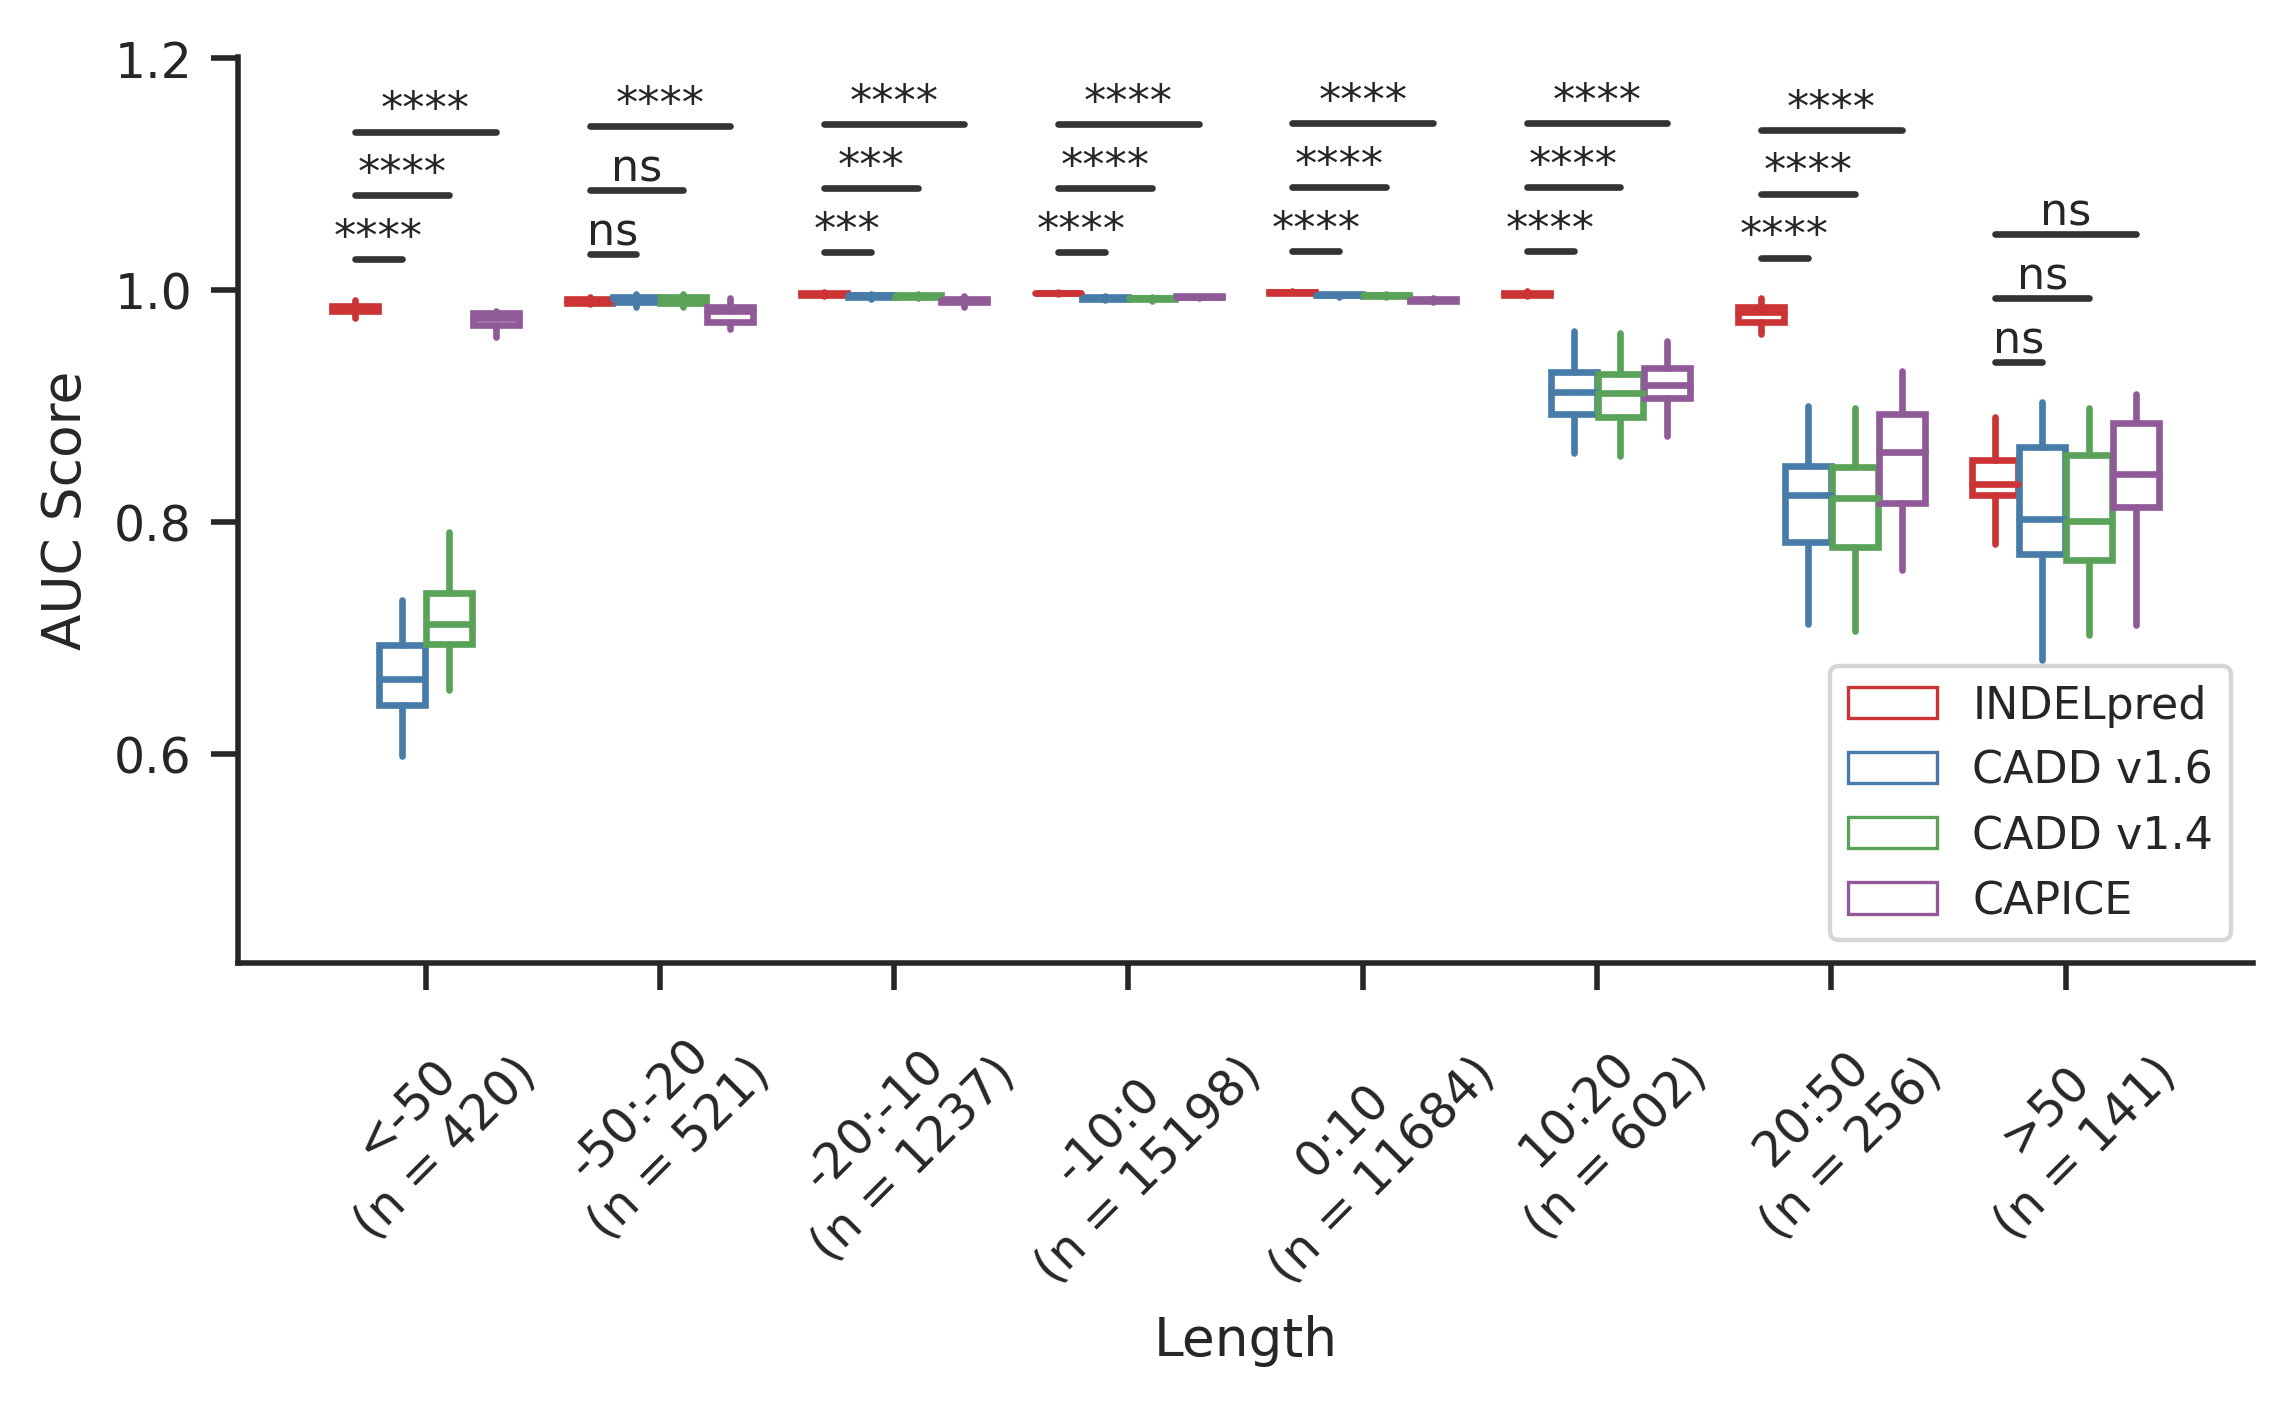

In [384]:
plt.figure(figsize=(6.5, 3))
pairs=[
                                       (('<-50', "INDELpred"), ("<-50", "CADD v1.6")),
                                       (('<-50', "INDELpred"), ("<-50", "CADD v1.4")),
                                       (('<-50', "INDELpred"), ("<-50", "CAPICE")),
                                       
                                       (('-50:-20', "INDELpred"), ("-50:-20", "CADD v1.6")),
                                       (('-50:-20', "INDELpred"), ("-50:-20", "CADD v1.4")),
                                       (('-50:-20', "INDELpred"), ("-50:-20", "CAPICE")),
                                       
                                       (('-20:-10', "INDELpred"), ("-20:-10", "CADD v1.6")),
                                       (('-20:-10', "INDELpred"), ("-20:-10", "CADD v1.4")),
                                       (('-20:-10', "INDELpred"), ("-20:-10", "CAPICE")),
                                       
                                       (('-10:0', "INDELpred"), ("-10:0", "CADD v1.6")),
                                       (('-10:0', "INDELpred"), ("-10:0", "CADD v1.4")),
                                       (('-10:0', "INDELpred"), ("-10:0", "CAPICE")),
                                       
                                       (('0:10', "INDELpred"), ("0:10", "CADD v1.6")),
                                       (('0:10', "INDELpred"), ("0:10", "CADD v1.4")),
                                       (('0:10', "INDELpred"), ("0:10", "CAPICE")),
                                       
                                       (('10:20', "INDELpred"), ("10:20", "CADD v1.6")),
                                       (('10:20', "INDELpred"), ("10:20", "CADD v1.4")),
                                       (('10:20', "INDELpred"), ("10:20", "CAPICE")),
                                       
                                       (('20:50', "INDELpred"), ("20:50", "CADD v1.6")),
                                       (('20:50', "INDELpred"), ("20:50", "CADD v1.4")),
                                       (('20:50', "INDELpred"), ("20:50", "CAPICE")),
                                       
                                       (('>50', "INDELpred"), (">50", "CADD v1.6")),
                                       (('>50', "INDELpred"), (">50", "CADD v1.4")),
                                       (('>50', "INDELpred"), (">50", "CAPICE")), 
                                   ]
box_data=merge_len_sub
key='Length'
ax = sns.boxplot(x=key, y="auc", hue="tool",data=box_data, palette=palette,showfliers=False,showcaps = False)
ax.legend(title='',title_fontsize=8,fontsize=8)
for i,artist in enumerate(ax.artists):
    # Set the linecolor on the artist to the facecolor, and set the facecolor to None
    col = artist.get_facecolor()
    artist.set_edgecolor(col)
    artist.set_facecolor('None')

    # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same colour as above
    for j in range(i*3,i*3+3):
        line = ax.lines[j]
        line.set_color(col)
        line.set_mfc(col)
        line.set_mec(col)

# Also fix the legend
for legpatch in ax.get_legend().get_patches():
    col = legpatch.get_facecolor()
    legpatch.set_edgecolor(col)
    legpatch.set_facecolor('None')
ax.set_ylim(0.42,1)
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.2))
from statannotations.Annotator import Annotator

annotator=Annotator(ax=ax, pairs=pairs,x=key, y="auc", hue="tool",data=box_data)
annotator.configure(test='Mann-Whitney', text_format='star', #loc='outside',
                   verbose=False,line_width=1.2,fontsize=8,line_height=0, 
                    text_offset=0,line_offset=0)
annotator.new_plot(ax,pairs=pairs,x=key, y="auc", hue="tool",data=box_data)
annotator.apply_and_annotate()

ax.set_xlabel(key)
ax.set_ylabel('AUC Score')
# ax.axes.get_xaxis().set_visible(False)
sns.despine()
adjust_box_widths(fig, 0.8)
# plt.grid(color='0.95')


plt.xticks(range(8),[str(m) + '\n(n = ' + str(n)+')'  for m,n in zip(merge_len_sub.drop_duplicates(['Length'])['Length'],num_list)],rotation=45)


plt.savefig("Fig20220315/Fig3_boxplot_len.pdf", format='pdf', dpi=400, bbox_inches='tight')

In [311]:
merge_len_sub.drop_duplicates(['Length'])['Length']

0       <-50
0    -50:-20
0    -20:-10
0      -10:0
0       0:10
0      10:20
0      20:50
0        >50
Name: Length, dtype: object

In [53]:
# merge_len_sub
np.mean(merge_len_sub[(merge_len_sub['tool']=='INDELpred') & (merge_len_sub['Length']=='20:50') ]['auc'])

0.9792327877046108

#### test dataset2

In [15]:
cadd16_test2=pd.read_csv('/media/bgi/zhangtongda/bgi//tfs11/ST_MCHRI_BIGDATA/zhangtongda/from_zfssz2_project//project/variang_predict2/predict_any_indels/cadd_anno_16/test2_data.cadd16.csv',sep='\t',header=0)
cadd16_test2 = cadd16_test2.groupby(['#Chrom_Pos_Ref_Alt']).median()
cadd16_test2 = cadd16_test2.rename(columns={'PHRED':'PHRED_v16'})

cadd14_test2=pd.read_csv('/media/bgi/zhangtongda/bgi//tfs11/ST_MCHRI_BIGDATA/zhangtongda/from_zfssz2_project//project/variang_predict2/predict_any_indels/cadd_anno_14/test2_data.cadd14.csv',sep='\t',header=0)
cadd14_test2 = cadd14_test2.groupby(['#Chrom_Pos_Ref_Alt']).median()
cadd14_test2 = cadd14_test2.rename(columns={'PHRED':'PHRED_v14'})

capice_train_id=pd.read_csv('/media/bgi/zhangtongda/project/project_bk/CAPICE_code/data/train_input.tsv.id.list',sep='\t',header=0)
# capice_train_id = capice_train_id['#Chrom_Pos_Ref_Alt']
capice_test2=pd.read_csv('/media/bgi/zhangtongda/bgi//tfs11/ST_MCHRI_BIGDATA/zhangtongda/from_zfssz2_project//project/variang_predict2/predict_any_indels/capice/test2_capice.csv',sep='\t',header=0)
capice_test2 = capice_test2.groupby(['chr_pos_ref_alt']).median()
capice_test2 = capice_test2.rename(columns={'probabilities':'capice_p'})
drop_id = list(set(capice_test2.index.to_list()).intersection(set(capice_train_id['#Chrom_Pos_Ref_Alt'])))
capice_test2 = capice_test2.drop(drop_id)

In [16]:
indelpred_test2 = pd.DataFrame(x_test2_prob)
indelpred_test2.index=x_test2_id
indelpred_test2.columns=['INDELpred_score']
indelpred_test2['tag']=y_test2.values
indelpred_test2['lab']=test2_lab.values

merge_df2 = pd.concat([indelpred_test2,cadd16_test2,cadd14_test2,capice_test2],axis=1)
merge_df2=merge_df2[merge_df2['INDELpred_score']>=0]

In [17]:
# merge2_df = pd.concat([test2_data_anno_score,cadd16_test2,cadd14_test2,capice_test2],axis=1)
merge2_df = merge_df2[merge_df2['tag'].isin([0,1])]
matrix_out,power_our,fpr_our, tpr_our,auc_our, pre_our, recall_our ,aps_our = score_all(merge2_df['tag'],merge2_df['INDELpred_score'],cut_off)
matrix_cadd16,power_cadd16,fpr_cadd16, tpr_cadd16,auc_cadd16, pre_cadd16, recall_cadd16 ,aps_cadd16 = score_all(merge2_df['tag'],merge2_df['PHRED_v16'],20)
matrix_cadd14,power_cadd14,fpr_cadd14, tpr_cadd14,auc_cadd14, pre_cadd14, recall_cadd14 ,aps_cadd14 = score_all(merge2_df['tag'],merge2_df['PHRED_v14'],20)
matrix_capice,power_capice,fpr_capice, tpr_capice,auc_capice, pre_capice, recall_capice ,aps_capice = score_all(merge2_df['tag'],merge2_df['capice_p'],0.02)



In [18]:
score_all(merge2_df['tag'],merge2_df['capice_p'],0.02)[4]

0.9579162951931606

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


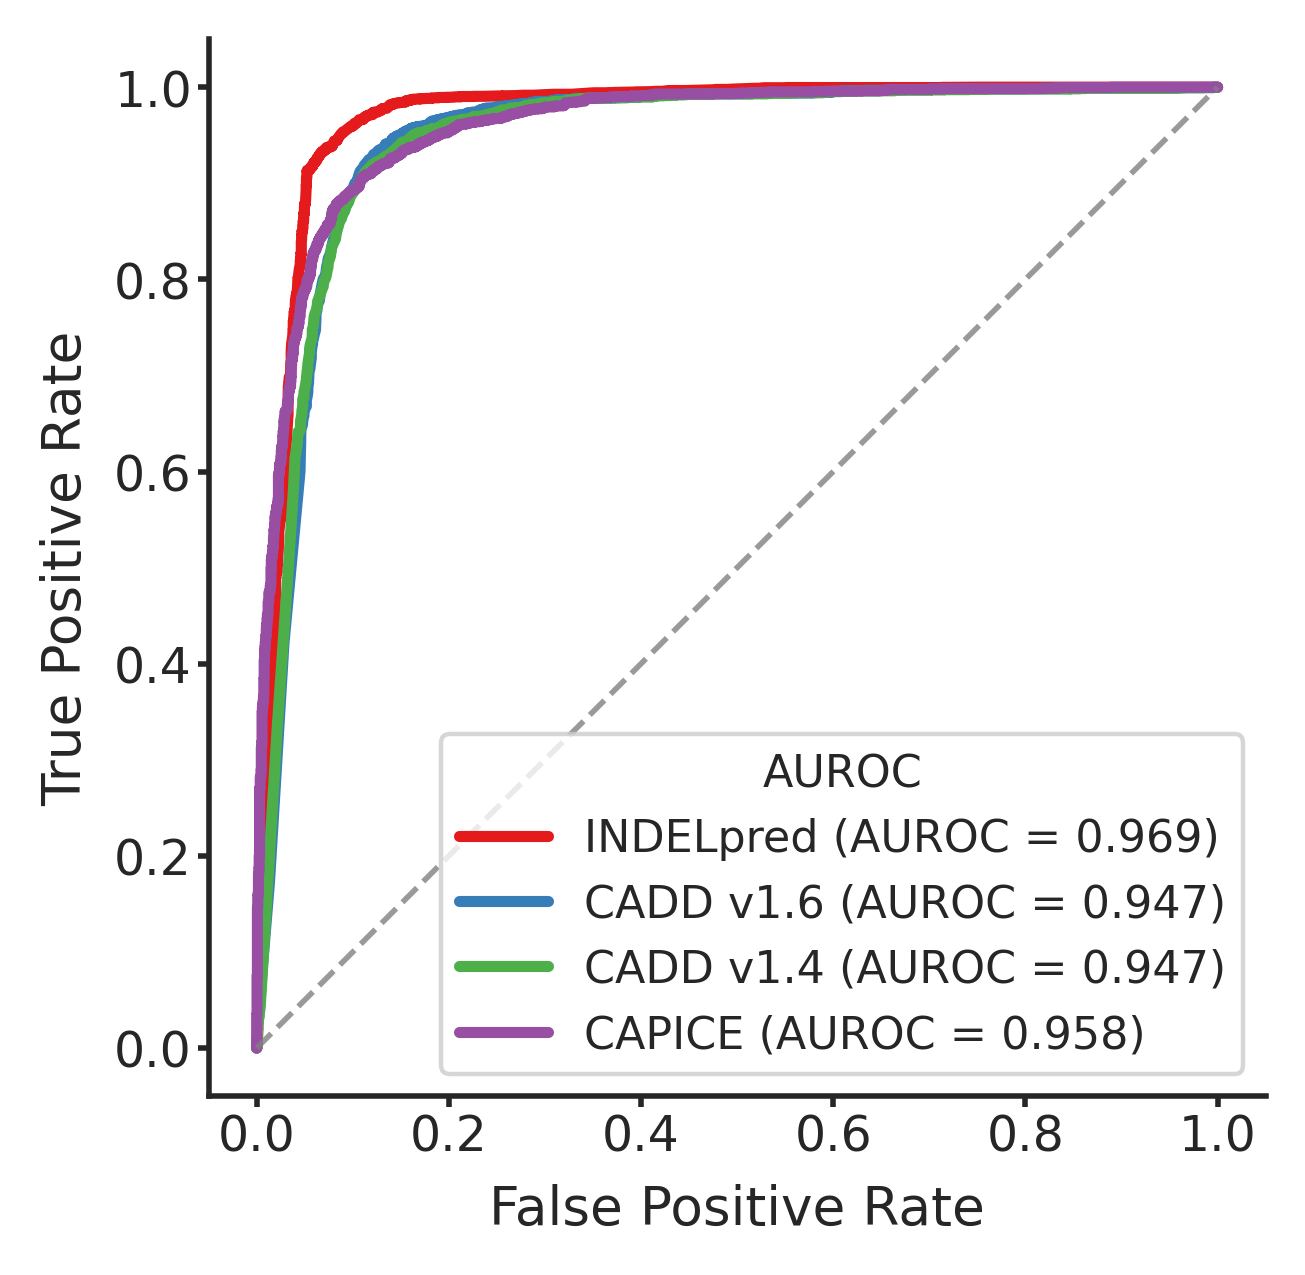

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axs = plt.subplots(1,1,figsize=(3.5,3.5))
#palette  = dict({'INDELpred':"#e41a1c", 'CADD v1.6':"#377eb8", 'CADD v1.4':"#4daf4a", 'CAPICE':"#984ea3"})

axs.plot(fpr_our, tpr_our, label='INDELpred (AUROC = %0.3f)' % auc_our,lw=2,color="#e41a1c")
axs.plot(fpr_cadd16, tpr_cadd16, label='CADD v1.6 (AUROC = %0.3f)' % auc_cadd16,lw=2,color="#377eb8")
axs.plot(fpr_cadd14, tpr_cadd14, label='CADD v1.4 (AUROC = %0.3f)' % auc_cadd14,lw=2,color="#4daf4a")
axs.plot(fpr_capice, tpr_capice, label='CAPICE (AUROC = %0.3f)' % auc_capice,lw=2,color="#984ea3")

axs.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=.8)
axs.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
)
sns.despine()
axs.set_aspect('equal','box')
axs.legend(loc="lower right",title='AUROC',title_fontsize=8,fontsize=8)#,frameon=False)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
axs.tick_params(direction='out', length=2, pad=1, width=1)


plt.savefig("Fig20220315/Fig4_auc_vkgl.pdf", format='pdf', dpi=400, bbox_inches='tight')

In [20]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# fig, axs = plt.subplots()
# axs.plot(recall_our, pre_our,  label='our_model (AUPR = %0.3f)' % aps_our,lw=2,color="#e41a1c")
# axs.plot(recall_cadd16, pre_cadd16,  label='CADD v1.6 (AUPR = %0.3f)' % aps_cadd16,lw=2,color="#377eb8")
# axs.plot(recall_cadd14, pre_cadd14,  label='CADD v1.4 (AUPR = %0.3f)' % aps_cadd14,lw=2,color="#4daf4a")
# axs.plot(recall_capice, pre_capice,  label='CAPICE (AUPR = %0.3f)' % aps_capice,lw=2,color="#984ea3")


# axs.set_xlabel('Recall')
# axs.set_ylabel('Precision')
# axs.legend(loc="lower left",fontsize=8)
# axs.set(
#     xlim=[-0.05, 1.05],
#     ylim=[-0.05, 1.05],
# )
# axs.set_aspect('equal','box')


# sns.despine()
# plt.savefig("Fig20220315/Fig4_pr_vkgl.pdf", format='pdf', dpi=400, bbox_inches='tight')

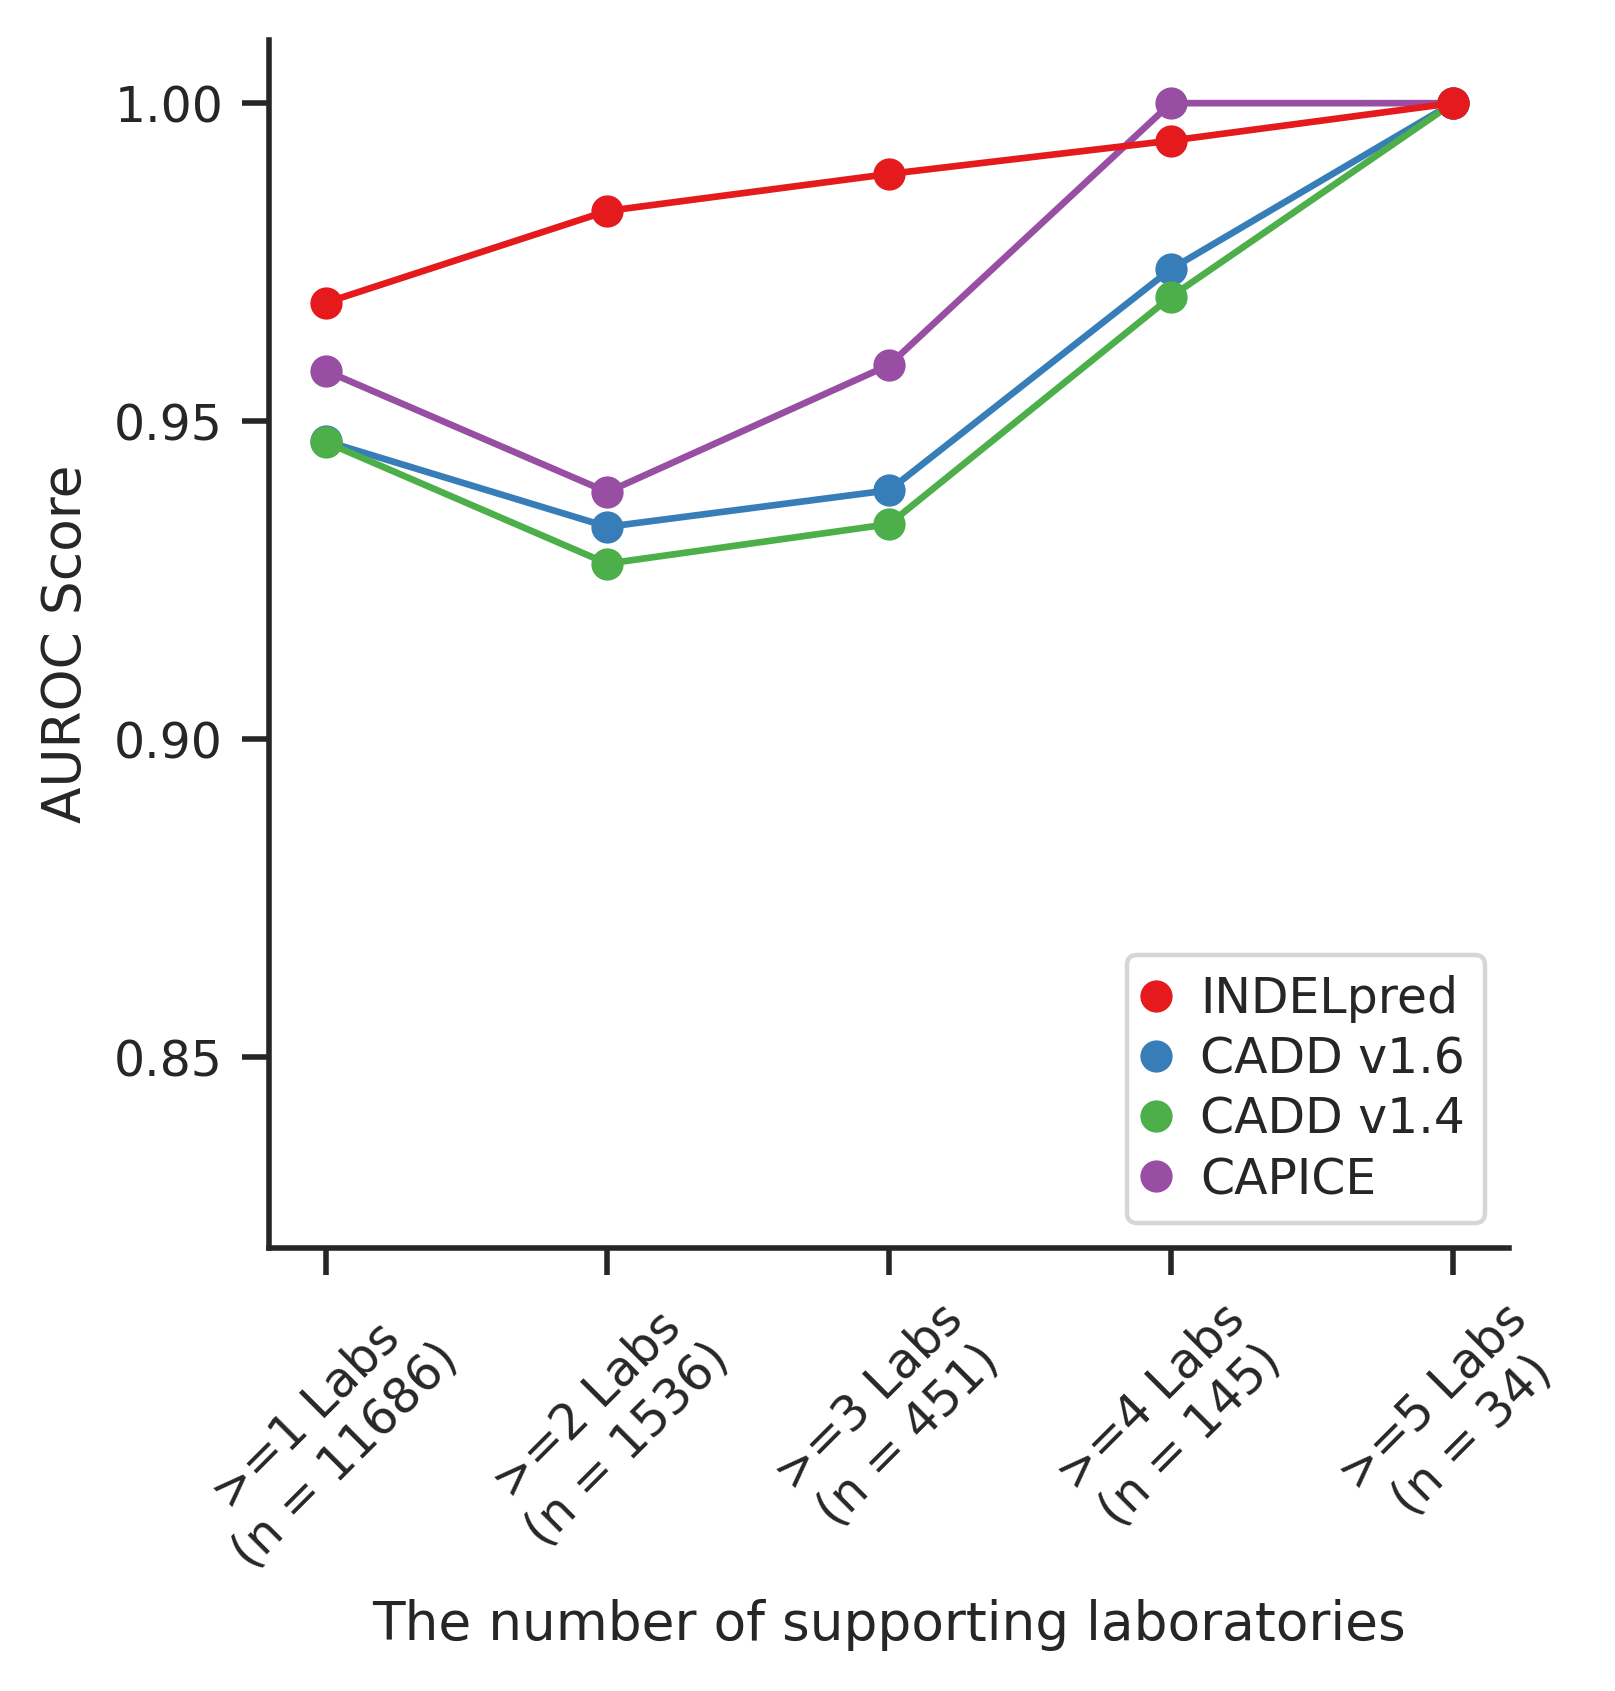

In [21]:
auc0_list=[]
auc1_list=[]
auc2_list=[]
auc3_list=[]
#palette  = dict({'INDELpred':"#e41a1c", 'CADD v1.6':"#377eb8", 'CADD v1.4':"#4daf4a", 'CAPICE':"#984ea3"})
num_list=[]
for star in [1,2,3,4,5]:
    merge2_sub_df = merge2_df[merge2_df['lab'].astype('int')>=star]
    num_list.append(merge2_sub_df.shape[0])
    auc0_list.append(auc_all(merge2_sub_df['tag'],merge2_sub_df['INDELpred_score'],cut_off))
    auc1_list.append(auc_all(merge2_sub_df['tag'],merge2_sub_df['PHRED_v16'],20))
    auc2_list.append(auc_all(merge2_sub_df['tag'],merge2_sub_df['PHRED_v14'],20))
    auc3_list.append(auc_all(merge2_sub_df['tag'],merge2_sub_df['capice_p'],0.02))


# fig,ax =plt.()
import matplotlib.ticker as ticker
fig,ax=plt.subplots(figsize=(4,4))

ax.plot(range(1,6),auc1_list,label="CADD v1.6",color="#377eb8",marker='o')
plt.plot(range(1,6),auc2_list,label="CADD v1.4",color="#4daf4a",marker='o')
plt.plot(range(1,6),auc3_list,label="CAPICE",color="#984ea3",marker='o')
plt.plot(range(1,6),auc0_list,label="INDELpred",color="#e41a1c",marker='o')
plt.ylim(0.82,1.01)


plt.xticks(range(1,6))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.05))
plt.xlabel('The number of supporting laboratories')
plt.ylabel('AUROC Score')
#plt.legend()
handles,labels = ax.get_legend_handles_labels()

handles = [handles[3], handles[0], handles[1],handles[2]]
labels = [labels[3], labels[0], labels[1],labels[2]]

plt.legend(handles,labels,loc='lower right', labelspacing=0.25, handlelength=0.4, handletextpad=0.7)
#ax.set_aspect('equal','box')

sns.despine() 
plt.xticks(range(1,6),['>='+str(m) + ' Labs\n(n = ' + str(n) + ')' for m,n in zip(range(1,6),num_list)],rotation=45)
# plt.xlim(0.5,5.5)
plt.savefig("Fig20220315/Fig4_aoc_lab.pdf", format='pdf', dpi=400, bbox_inches='tight')

In [22]:
lab_mean=[]
lab_std=[]
#palette  = dict({'INDELpred':"#e41a1c", 'CADD v1.6':"#377eb8", 'CADD v1.4':"#4daf4a", 'CAPICE':"#984ea3"})
num_list=[]
for star in [1,2,3,4,5]:
    merge2_sub_df = merge2_df[merge2_df['lab'].astype('int')>=star]
    num_list.append(merge2_sub_df.shape[0])
    resample_out = resample_benchmark(merge2_sub_df)
    lab_mean.append([np.mean(resample_out[resample_out['tool'] == tool]['auc']) for tool in ['INDELpred',
                                                                                              'CADD v1.6',
                                                                                              'CADD v1.4',
                                                                                              'CAPICE']])
    lab_std.append([np.std(resample_out[resample_out['tool'] == tool]['auc']) for tool in ['INDELpred',
                                                                                              'CADD v1.6',
                                                                                              'CADD v1.4',
                                                                                              'CAPICE']])

/home/zhangtongda/.local/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/home/zhangtongda/.local/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/home/zhangtongda/.local/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/home/zhangtongda/.local/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/home/zhangtongda/.local/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:990: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(

<ipython-input-23-f701928e7997>:12: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.errorbar([m+i*0.1 for m in range(1,6)],pd.DataFrame(lab_mean)[i],pd.DataFrame(lab_std)[i],
No handles with labels found to put in legend.


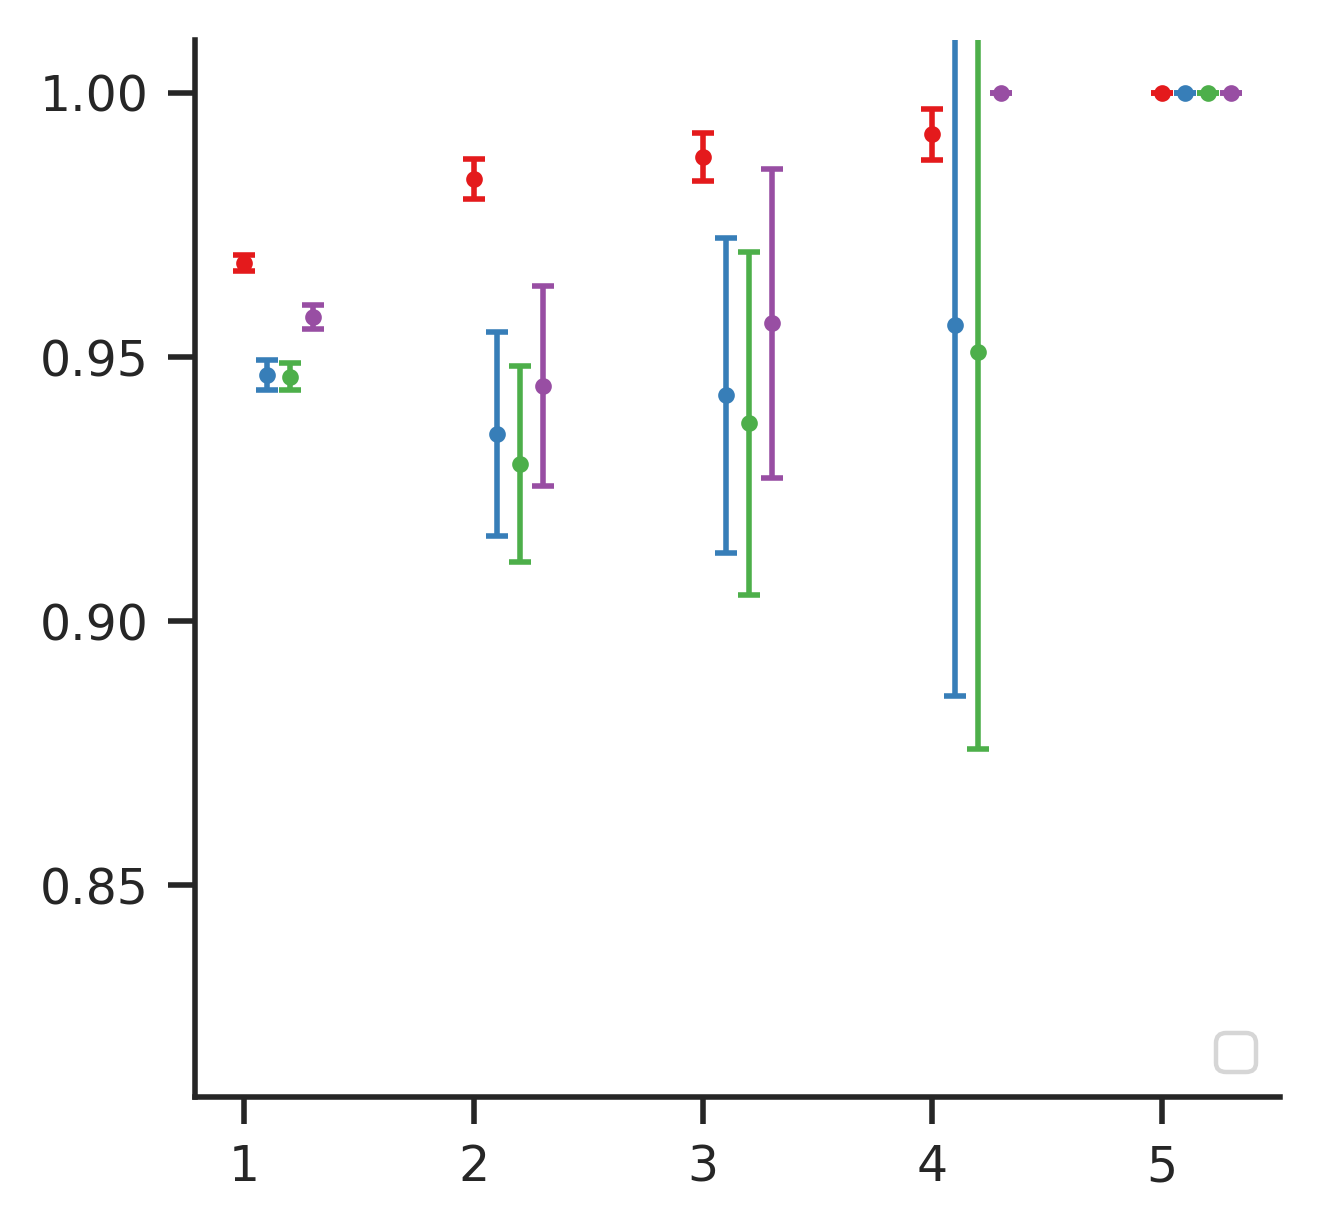

In [23]:
# pd.DataFrame(lab_mean)
fig, axs = plt.subplots(1,1,figsize=(3.5,3.5))
for i,label,color in zip(range(4),
                         ['INDELpred','CADD v1.6', 'CADD v1.4','CAPICE'],
                        ["#e41a1c","#377eb8","#4daf4a","#984ea3"]):
#     plt.plot([m+i*0.1 for m in range(1,6)],
#              pd.DataFrame(lab_mean)[i],label=label,color=color,)
#     lower=pd.DataFrame(lab_mean)[i] - 1.96*pd.DataFrame(lab_std)[i]
#     upper=pd.DataFrame(lab_mean)[i] + 1.96*pd.DataFrame(lab_std)[i]
#     upper[upper >1] =1           
#     axs.fill_between(range(1,6), lower , upper, alpha=0.2)
    plt.errorbar([m+i*0.1 for m in range(1,6)],pd.DataFrame(lab_mean)[i],pd.DataFrame(lab_std)[i],
                 lw = 1,capsize = 2,MarkerSize=2,ecolor=color,fmt='o',color=color,marker='o')
#     plt.scatter([m+i*0.1 for m in range(1,6)],pd.DataFrame(lab_mean)[i], c=color,s=2)


plt.ylim(0.81,1.01)
axs.yaxis.set_major_locator(ticker.MultipleLocator(0.05))
sns.despine() 
plt.legend(loc='lower right', labelspacing=0.25, handlelength=0.4, handletextpad=0.7)

In [170]:
indelpred_test2.shape,cadd16_test2.shape,cadd14_test2.shape,capice_test2.shape

((11763, 3), (10484, 3), (10484, 3), (8389, 1))

#### dataset3_runtime

In [24]:
data_dir='/media/bgi/zhangtongda/bgi///tfs11/ST_MCHRI_BIGDATA/zhangtongda/from_zfssz2_project//project/variang_predict2/INDELpred_0124/test_data_set3/runtime/'
runtime_f='runtime.out'
runtime_df=pd.read_csv(os.path.join(data_dir, runtime_f),sep='\t',header=0)
runtime_df

,method,runtime
0,INDELpred,19
1,INDELpred,22
2,INDELpred,29
3,INDELpred,20
4,INDELpred,24
...,...,...
115,CAPICE,235
116,CAPICE,151
117,CAPICE,106
118,CAPICE,529


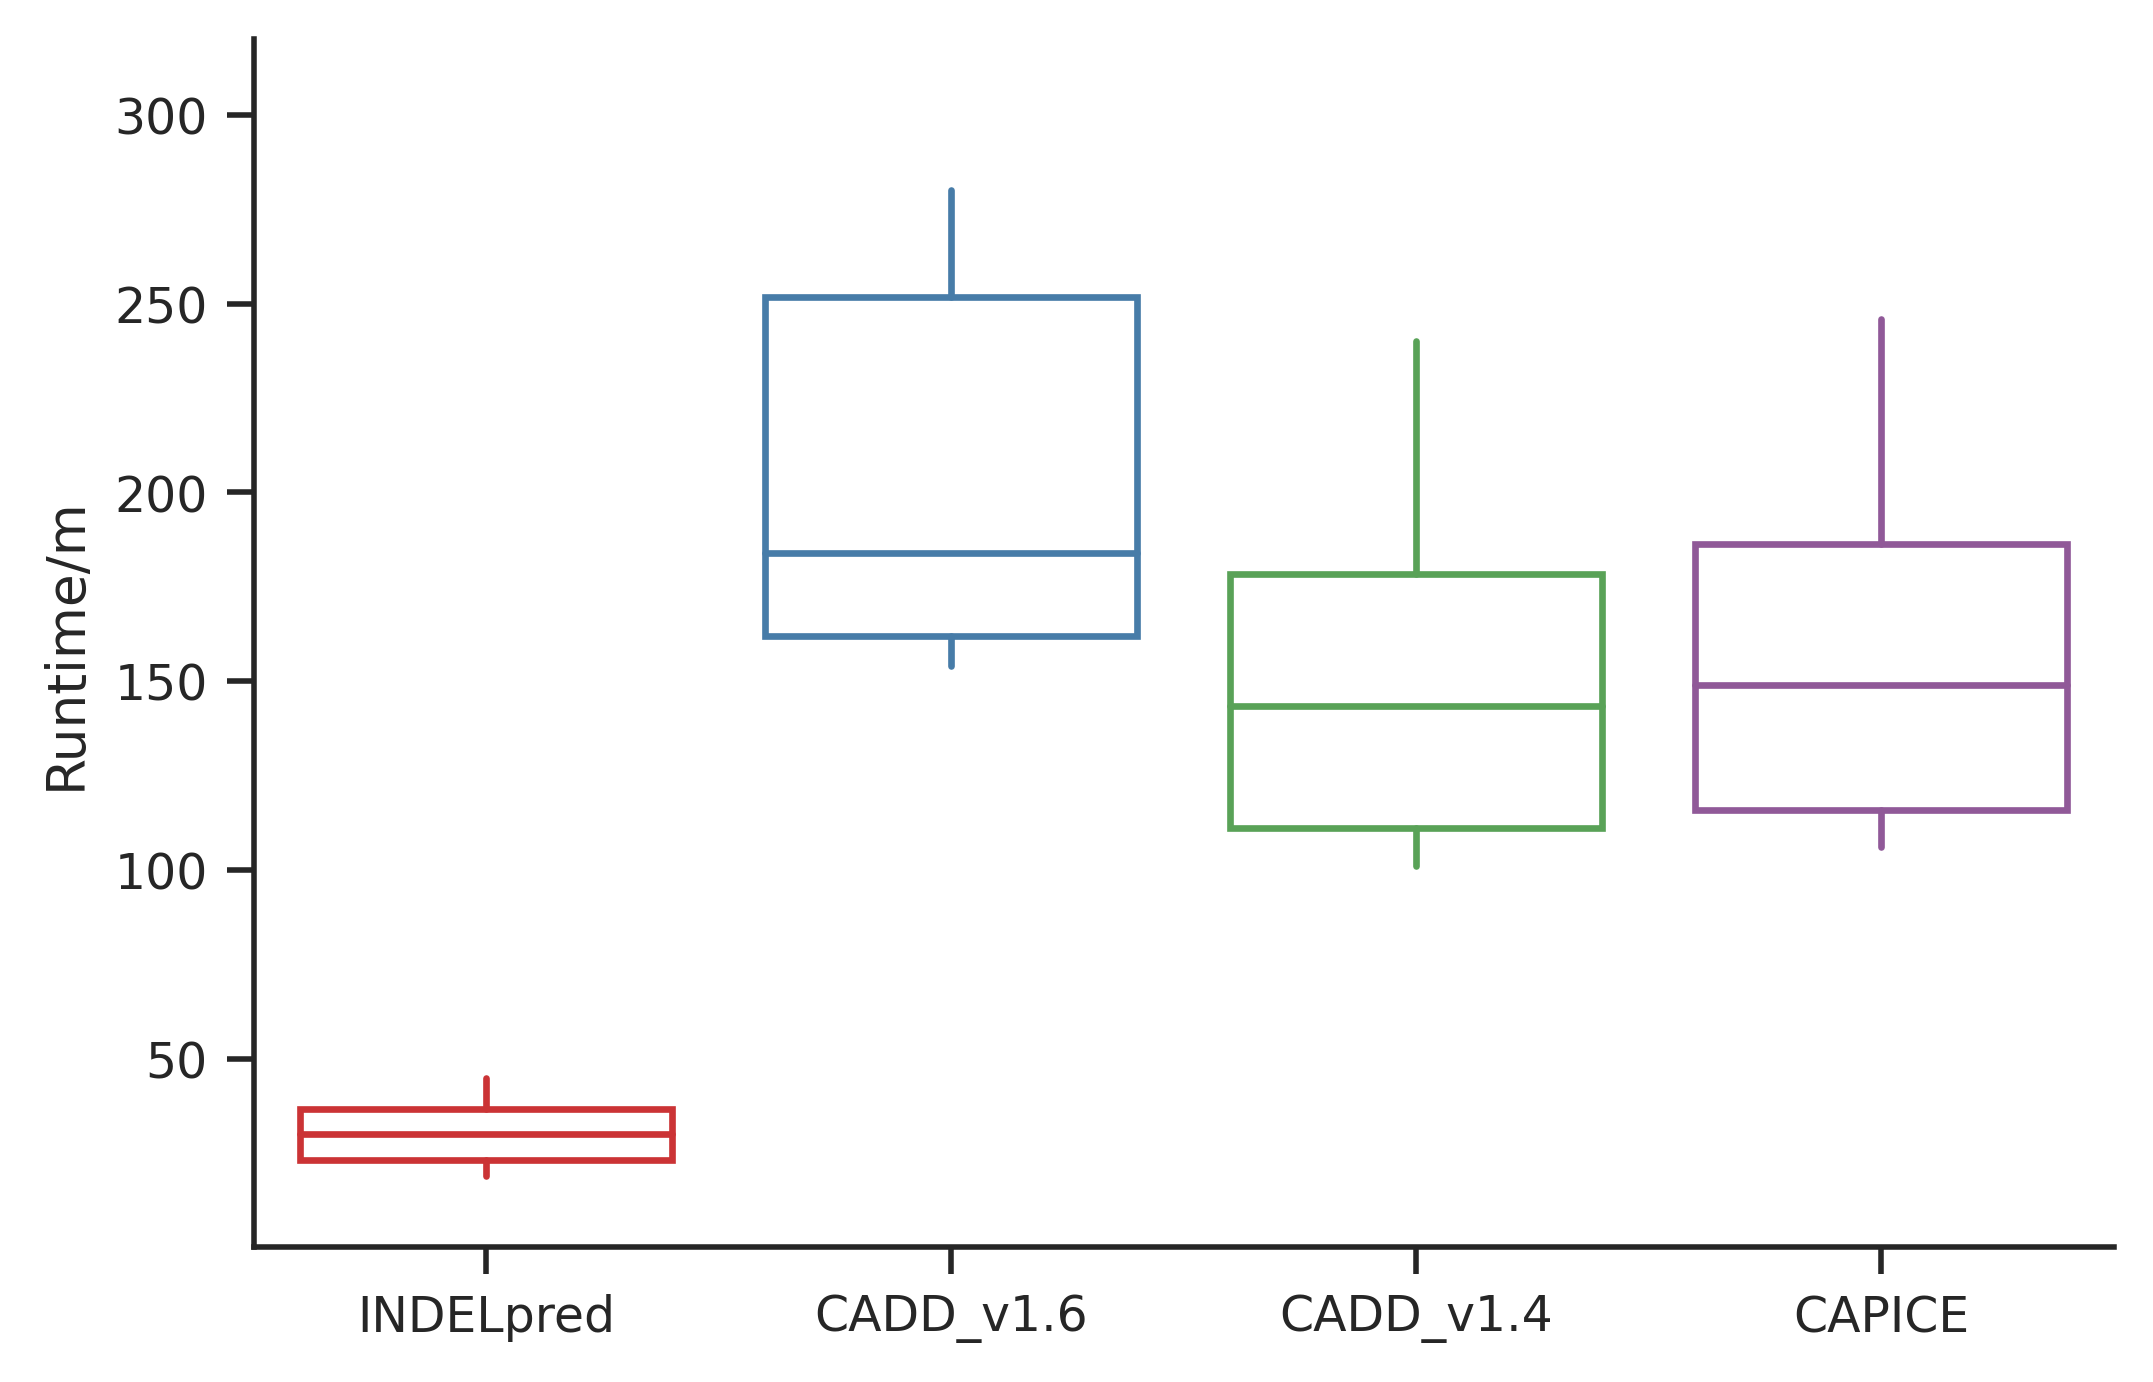

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
my_pal={"INDELpred":"#e41a1c",
        "CADD_v1.6":"#377eb8",
        "CADD_v1.4":"#4daf4a",
        "CAPICE":"#984ea3"}
ax = sns.boxplot(x='method',y='runtime',data=runtime_df,palette=my_pal,
                showfliers=False,showcaps = False)
#sns.violinplot(x='method',y='runtime',data=runtime_df,palette=my_pal)
#ax.legend(title='',title_fontsize=8,fontsize=8)
for i,artist in enumerate(ax.artists):
    # Set the linecolor on the artist to the facecolor, and set the facecolor to None
    col = artist.get_facecolor()
    artist.set_edgecolor(col)
    artist.set_facecolor('None')

    # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same colour as above
    for j in range(i*3,i*3+3):
        line = ax.lines[j]
        line.set_color(col)
        line.set_mfc(col)
        line.set_mec(col)

# Also fix the legend
# for legpatch in ax.get_legend().get_patches():
#     col = legpatch.get_facecolor()
#     legpatch.set_edgecolor(col)
#     legpatch.set_facecolor('None')
plt.ylim(0.01,320)
plt.xlabel("")
plt.ylabel("Runtime/m")
sns.despine()
plt.savefig("Fig20220315/Fig5_wgs_runtime.pdf", format='pdf', dpi=400, bbox_inches='tight')

In [62]:
np.mean(runtime_df[runtime_df['method'] ==  'INDELpred']['runtime'].values)

31.066666666666666

In [63]:
np.mean(runtime_df[runtime_df['method'] ==  'CADD_v1.4']['runtime'].values)/np.mean(runtime_df[runtime_df['method'] ==  'INDELpred']['runtime'].values)

5.242489270386266

In [64]:
np.mean(runtime_df[runtime_df['method'] ==  'CADD_v1.6']['runtime'].values)/np.mean(runtime_df[runtime_df['method'] ==  'INDELpred']['runtime'].values)

8.380901287553648

In [65]:
np.mean(runtime_df[runtime_df['method'] ==  'CAPICE']['runtime'].values)

168.23333333333332

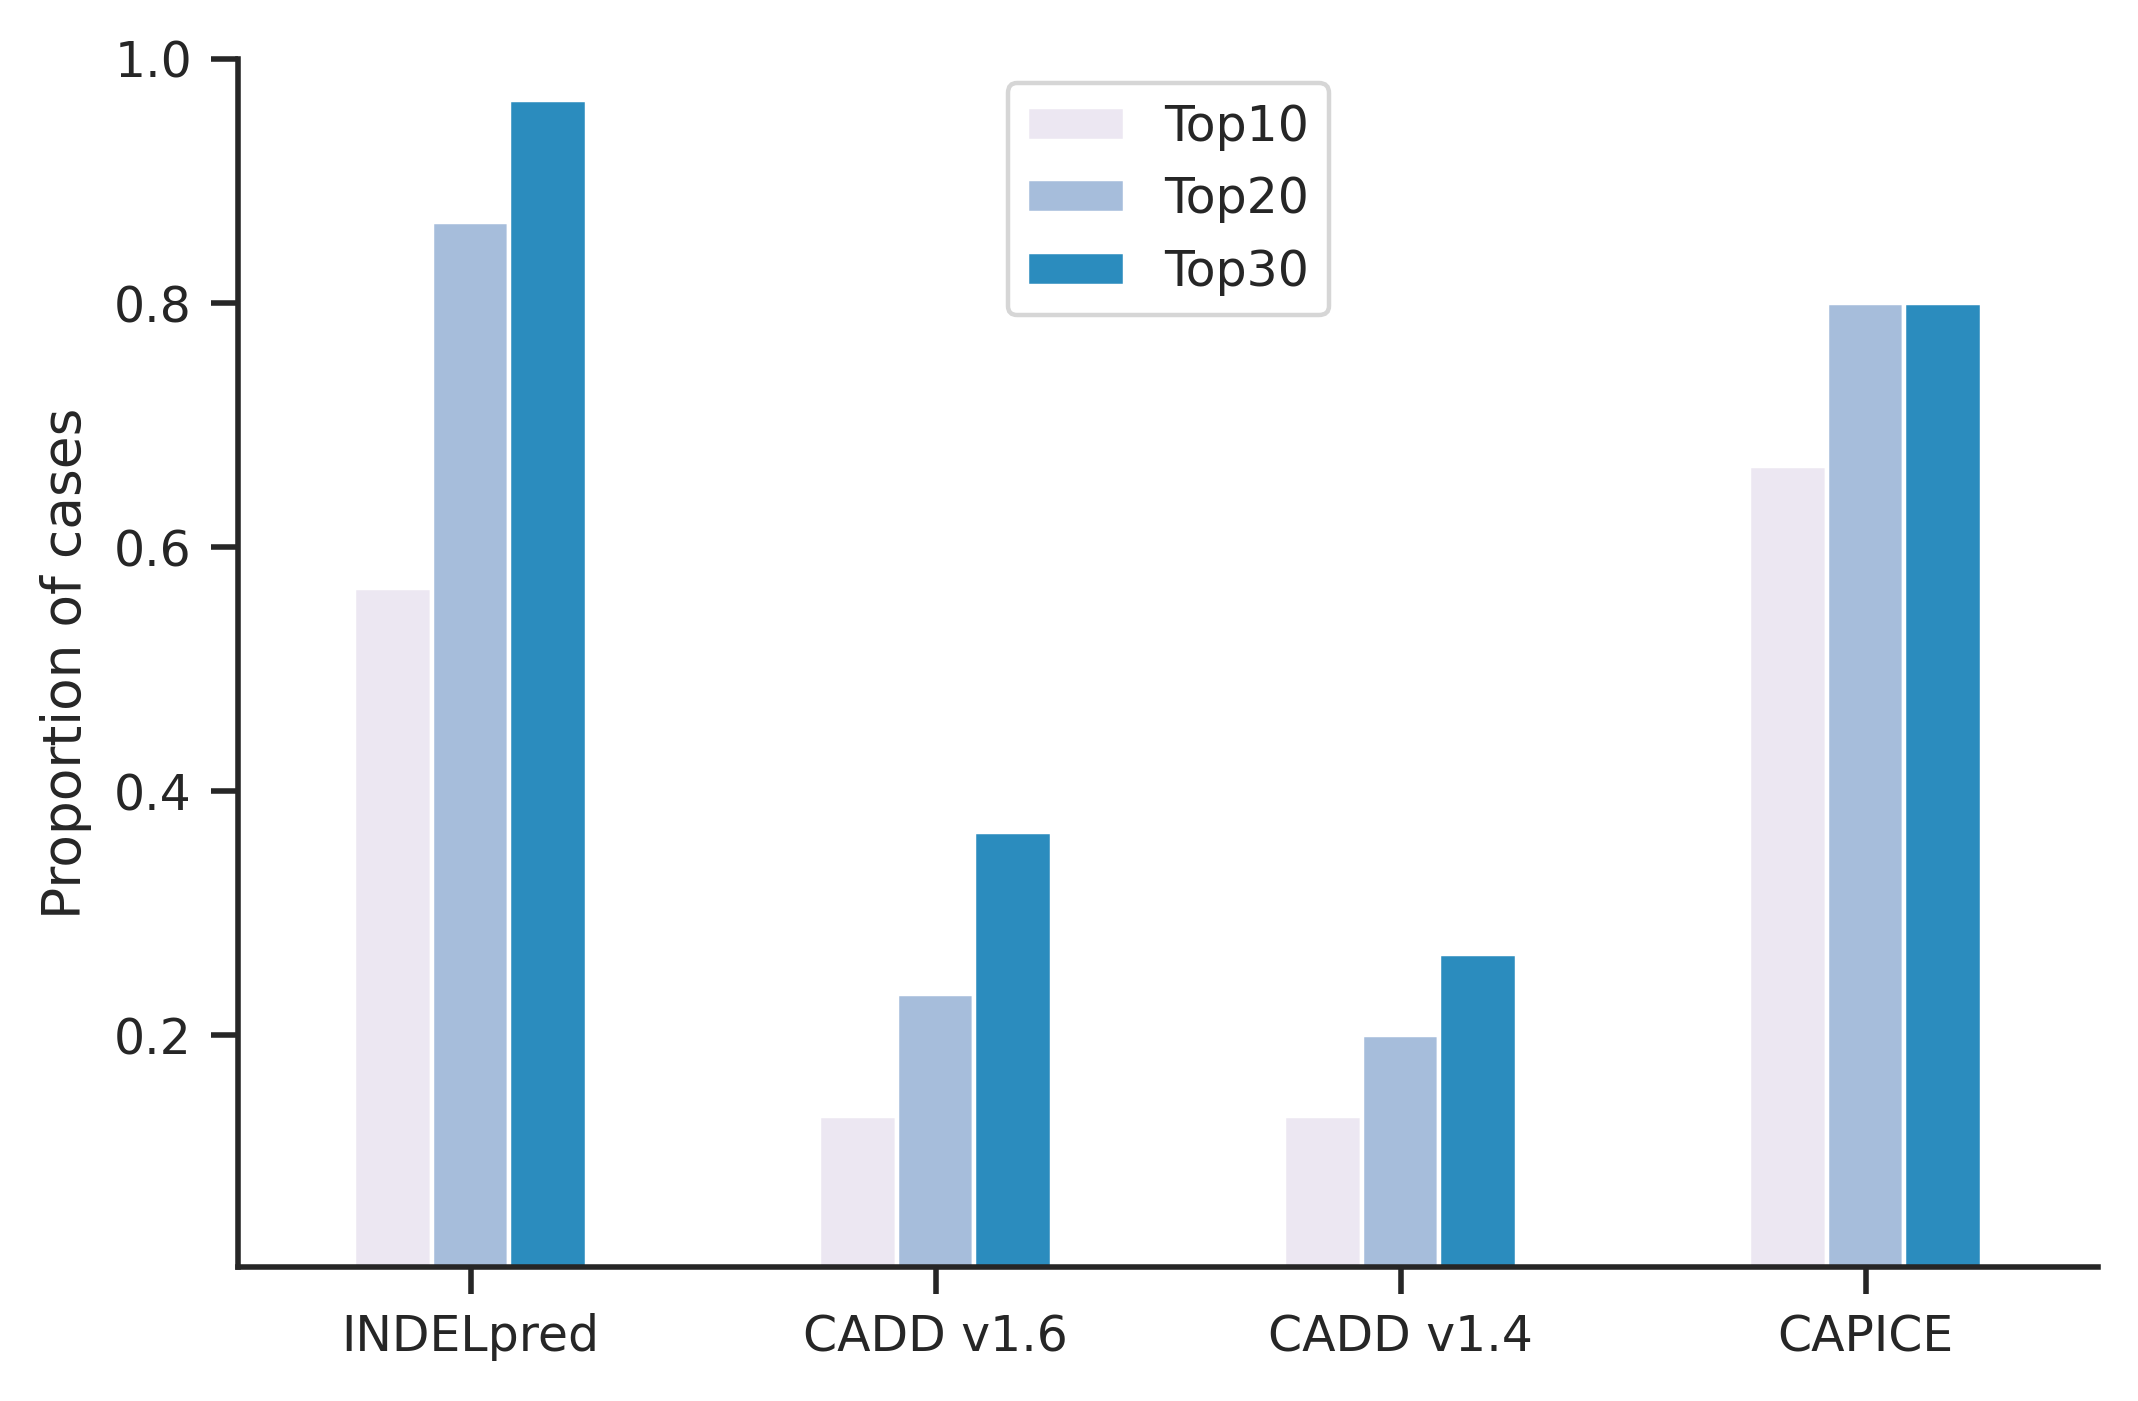

In [43]:
# fig, axs = plt.subplots(1,1,figsize=(3.5,3.5))
method_list=['INDELpred','CADD v1.6','CADD v1.4','CAPICE']
sovled_p_10=[17/30,4/30,4/30,20/30]
sovled_p_20=[26/30,7/30,6/30,24/30]
sovled_p_30=[29/30,11/30,8/30,24/30]
d3_df = pd.DataFrame([sovled_p_10,sovled_p_20,sovled_p_30]).T
d3_df.columns=['Top10','Top20','Top30',]
d3_df.index=method_list
d3_df.plot(kind='bar',rot=360,color={'Top10':"#ece7f2",'Top20':"#a6bddb",'Top30':"#2b8cbe"})
plt.ylabel("Proportion of cases")
plt.ylim(0.01,1)
sns.despine()
# plt.bar(method_list,sovled_p_10,color='r',label='top10')
# plt.bar(method_list,sovled_p_20,color='b',label='top20')
plt.savefig("Fig20220315/Fig5_wgs_top.pdf", format='pdf', dpi=400, bbox_inches='tight')